## NEK NASLOV, 
** KRATEK OPIS

### 1. PRIKAZ ZVEZNIH DRŽAV NA MAPI, GLEDE NA KATEGORIJO LEGALIZACIJO
Kategorija legalizacije:
- **V celoti legalizirane**: To so zvezne države, kjer je uporaba, posedovanje in prodaja konoplje povsem legalna pod določenimi pogoji. 
- **Rekreacijsko legalizirane**: V teh zveznih državah je uporaba konoplje legalna za rekreacijske namene, kar pomeni, da ljudje lahko zakonito uživajo te substance brez medicinskega ali terapevtskega razloga. 
- **Medicinsko legalizirane**: Zvezne države v tej kategoriji dovoljujejo uporabo konoplje izključno za medicinske in terapevtske namene pod nadzorom zdravstvenih strokovnjakov.
- **Ni legalizirana**: V teh zveznih državah so določene substance popolnoma prepovedane in so kaznovane z zakonodajo, ki se razlikuje od zvezne države do zvezne države.ržave.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
legalization_excel = r"podatki/legalization.csv"

df = pd.read_csv(legalization_excel)

legalization_dict = {
    "legalizirana": [],
    "legalizirana_rec": [],
    "legalizirana_med": [],
    "ni_legalizirana": []
}


for index, row in df.iterrows():
    state = row['State']
    code = row['Code']
    rec = row['Recreational']
    med = row['Medical']
    
    if rec == "Yes" and med == "Yes":
        legalization_dict["legalizirana"].append([state, code, rec, med])
    elif rec == "Yes" and med != "Yes":
        legalization_dict["legalizirana_rec"].append([state, code, rec, med])
    elif rec != "Yes" and med == "Yes":
        legalization_dict["legalizirana_med"].append([state, code, rec, med])
    else:
        legalization_dict["ni_legalizirana"].append([state, code, rec, med])
        
#for category, rows in legalization_dict.items():
 #   print(category + ":")
  #  for row in rows:
   #     print(row)
    #print()


Število držav z legalizirano rekreativno konopljo: 0
Število držav z legalizirano medicinsko konopljo: 16
Število držav v celoti legalizirano konopljo: 24
Število držav, ki nima legalizirane konoplje: 10


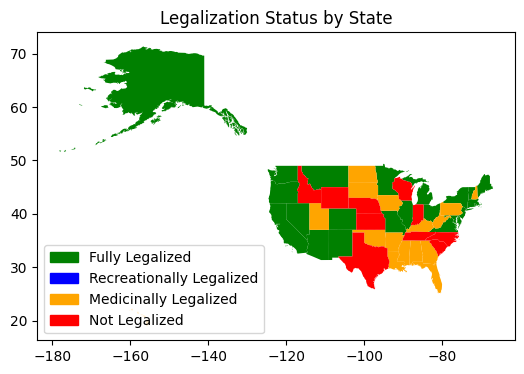

In [3]:
# shapefile containing the geometry of the US states
us_map = gpd.read_file(r"C:\Users\Uporabnik\Downloads\States_shapefile-shp\States_shapefile.shp")
colors = {'legalizirana': 'green', 'legalizirana_rec': 'blue', 'legalizirana_med': 'orange', 'ni_legalizirana': 'red'}

#print(us_map.columns)
# Mapa
fig, ax = plt.subplots(figsize=(30, 4))

print("Število držav z legalizirano rekreativno konopljo:", len(legalization_dict["legalizirana_rec"]))
print("Število držav z legalizirano medicinsko konopljo:", len(legalization_dict["legalizirana_med"]))
print("Število držav v celoti legalizirano konopljo:", len(legalization_dict["legalizirana"]))
print("Število držav, ki nima legalizirane konoplje:", len(legalization_dict["ni_legalizirana"]))

# PlotTING each category with a different color
for category, state_list in legalization_dict.items():
    for state_info in state_list:
        state_name = state_info[0].upper()   # Get state name from the state_info list
        if state_name not in us_map['State_Name'].values:
            print(f"{state_name} not found in the map")
            print(us_map['State_Name'])
        else:
            us_map[us_map['State_Name'] == state_name].plot(ax=ax, color=colors[category])

# legend
legend_labels = {'legalizirana': 'Fully Legalized', 'legalizirana_rec': 'Recreationally Legalized', 
                 'legalizirana_med': 'Medicinally Legalized', 'ni_legalizirana': 'Not Legalized'}
handles = [plt.Rectangle((0,0),1,1, color=colors[category]) for category in legalization_dict.keys()]
ax.legend(handles, legend_labels.values(), loc='lower left')

# Set plot title
ax.set_title('Legalization Status by State')

# Show the map
plt.show()


### PRIKAZ ŠTEVILA BREZDOMCEV GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE

In [4]:
def populacija(state_code, year):
    population_file = r"podatki/population.csv"
    df_population = pd.read_csv(population_file)
    for index_population, row_population in df_population.iterrows():
        year_population = row_population["Year"]
        state_population = row_population["Code"]
        value_population = row_population["Value"]
        if state_code == state_population and year_population == year:
            # Spremeni niz v število in odstrani vejico
            value_population = float(value_population.replace(",", "").replace(".",""))
            return value_population
    return None



In [5]:
legalization_csv = r"podatki/legalization.csv"
df = pd.read_csv(legalization_csv)

# dictionary s podatki o legalizaciji
legalization_dict = {}
for year in range(1990, 2025):
    legalization_dict[year] = {
        "legalizirana": [],
        "legalizirana_rec": [],
        "legalizirana_med": [],
        "ni_legalizirana": []
    }

for index, row in df.iterrows():
    state = row['State']
    code = row['Code']
    rec = row['Recreational']
    med = row['Medical']
    year_rec = row['Year legalized (Rec)']
    year_med = row['Year legalized (Med)']
    
    for year in range(1990, 2025):
        
            if rec == "Yes" and med == "Yes":
                if year >= year_rec or year >= year_med:
                    legalization_dict[year]["legalizirana"].append([state, code, rec, med])
            elif rec == "Yes" and med != "Yes":
                if year >= year_rec or year >= year_med:
                    legalization_dict[year]["legalizirana_rec"].append([state, code, rec, med])
            elif rec != "Yes" and med == "Yes":
                if year >= year_rec or year >= year_med:
                    legalization_dict[year]["legalizirana_med"].append([state, code, rec, med])
            else:
                legalization_dict[year]["ni_legalizirana"].append([state, code, rec, med])


#for year, data in legalization_dict.items():
  #  print(f"Podatki za leto {year}:")
  #  for category, states in data.items():
   #     print(f"Kategorija: {category}")
    #    for state in states:
    #        print(f"   Država: {state[0]}, Koda: {state[1]}, Recreational: {state[2]}, Medical: {state[3]}")
    #print()

# Združi podatke o legalizaciji s podatki o brezdomcih za vsako leto od 2007 do 2024

In [6]:
dict_homeless = {}

for i in range(2007, 2023):
    dict_homeless[i] = []
    excel_file_homelessness = r"podatki/homelessness.csv"
    df_homeless = pd.read_csv(excel_file_homelessness)
    for index_homeless, row_homeless in df_homeless.iterrows():
        home_year = row_homeless["Year"]
        state_code_homeless = row_homeless["State"]
  
        overall = row_homeless["Overall Homeless"]
        
        # pogoj ker homeless data do 2022
        if home_year == i and home_year != 2023:
            št_prebivalcev = populacija(state_code_homeless, home_year)
            procentno = (overall / št_prebivalcev) * 100
            
            # Dodamo podatke za vsako kategorijo iz legalization_dict, ki ustreza državi
            if i in legalization_dict:
                for k, v in legalization_dict[i].items():
                    for element in v:
                        state_name = element[0]
                        state_code = element[1]
                        if state_code == state_code_homeless:
                            dict_homeless[i].append([state_name, procentno, k])
                      

#for year, data in dict_homeless.items():
#    print(f"Podatki za leto {year}:")
 #   for item in data:
  #    print(f"Država: {item[0]}, Brezdomci: {item[1]:.2f}%, Kategorija: {item[2]}")
  #  print()


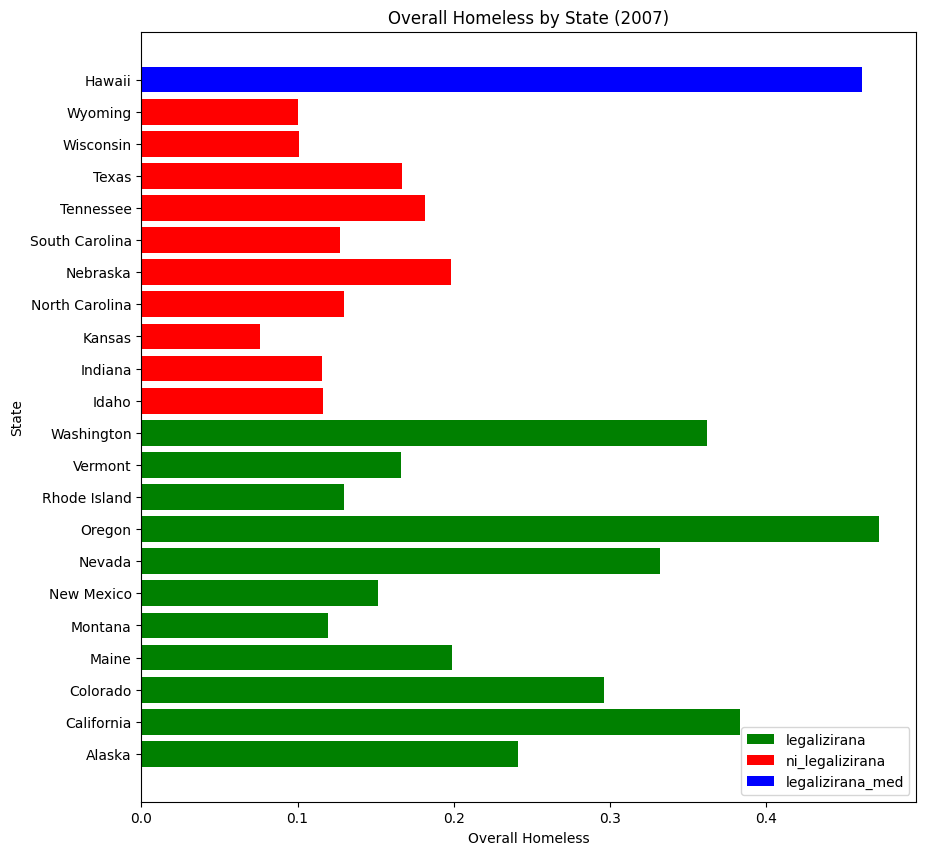

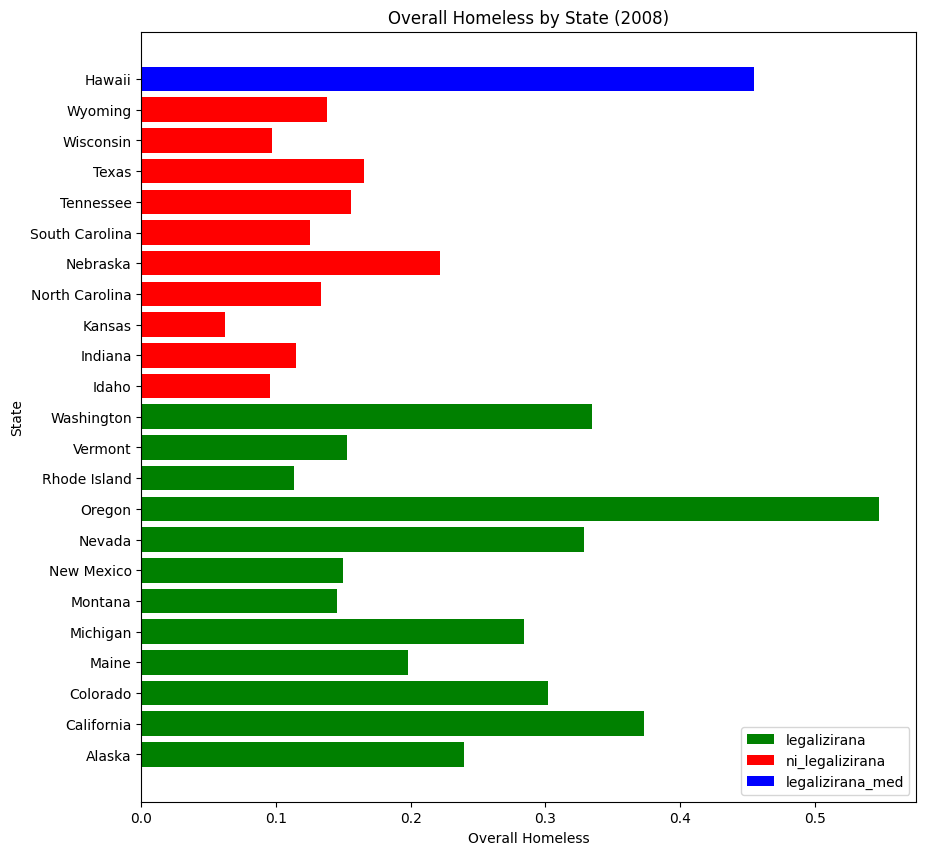

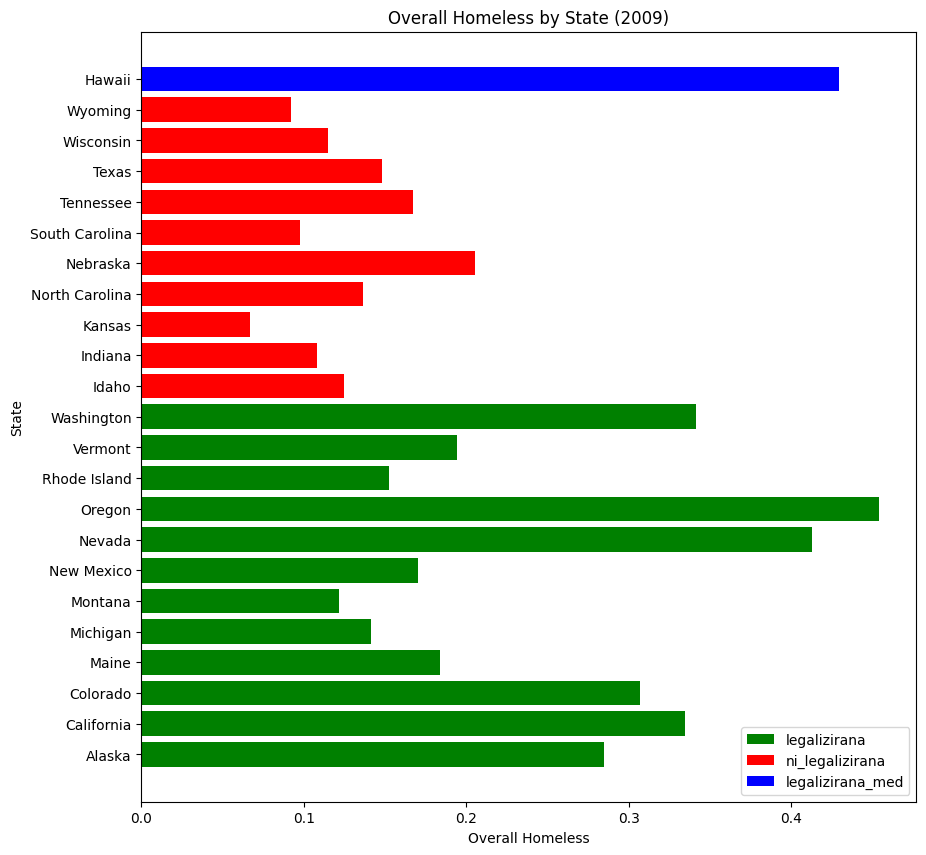

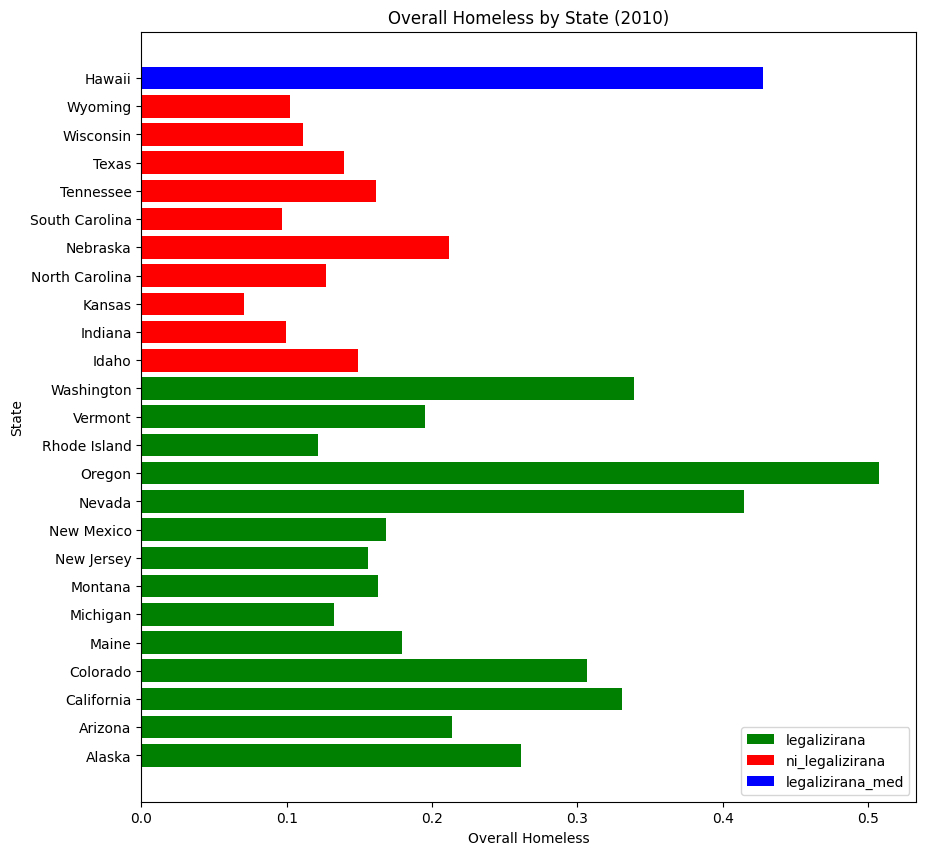

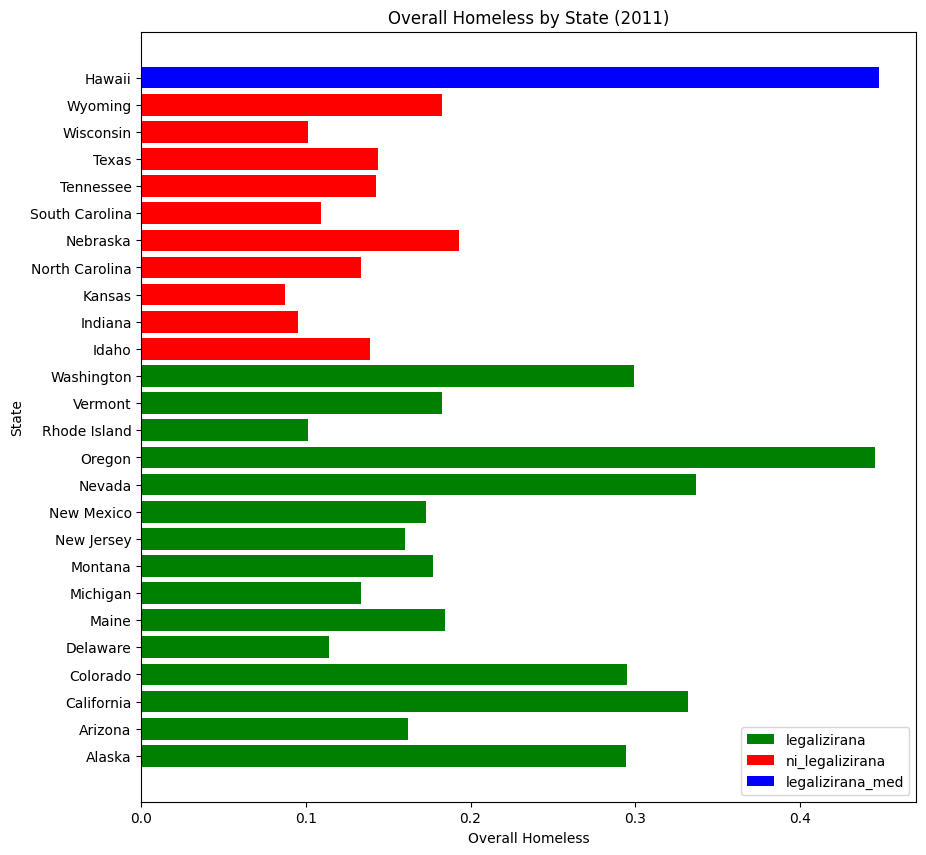

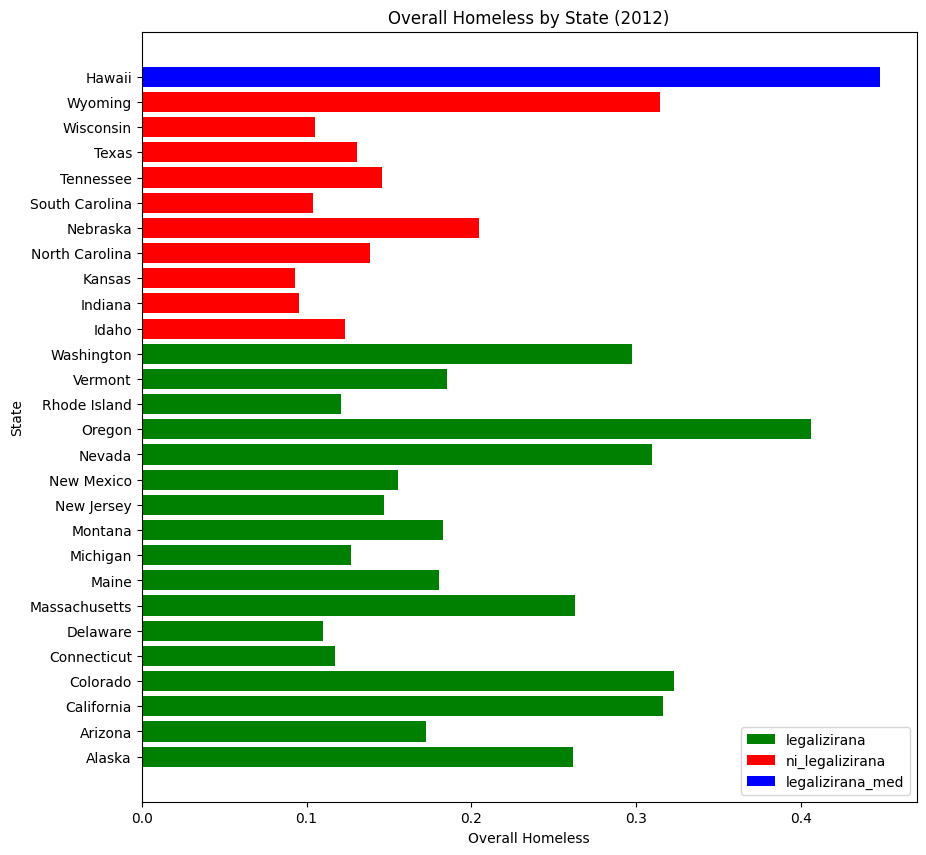

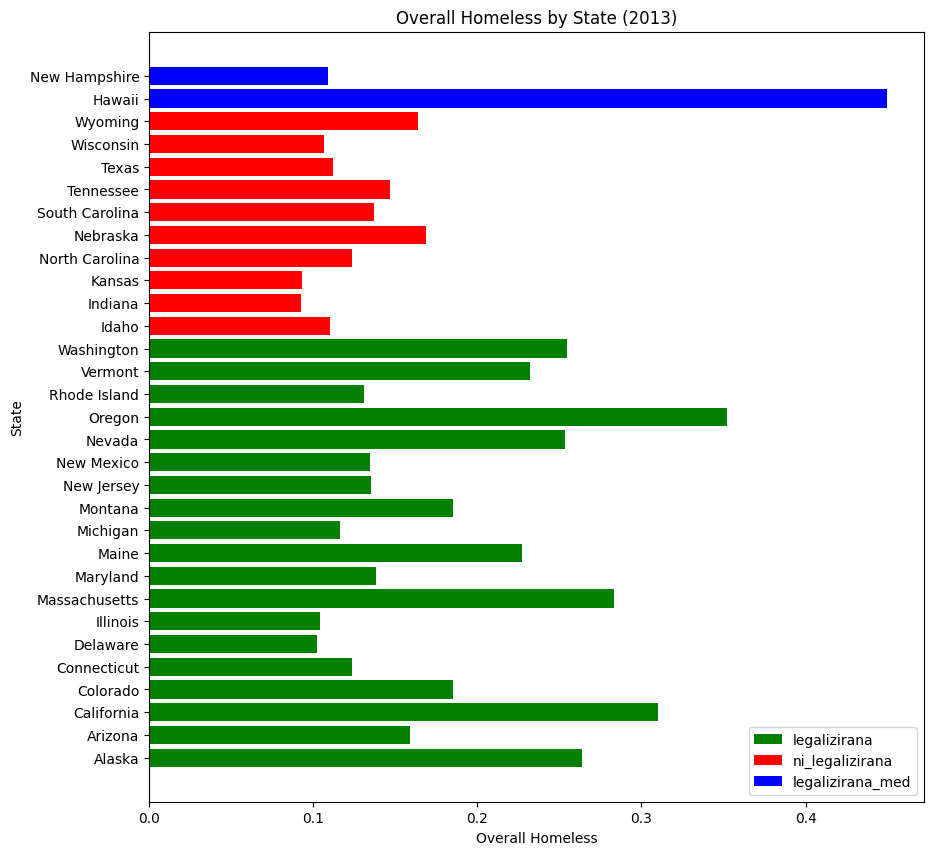

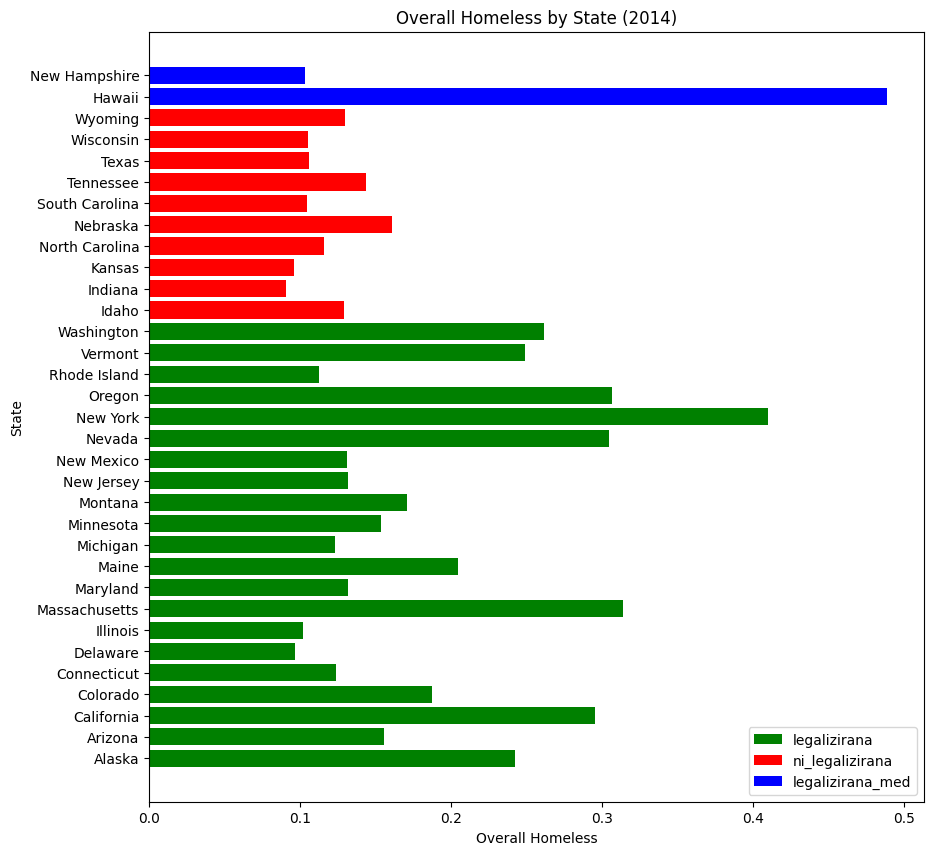

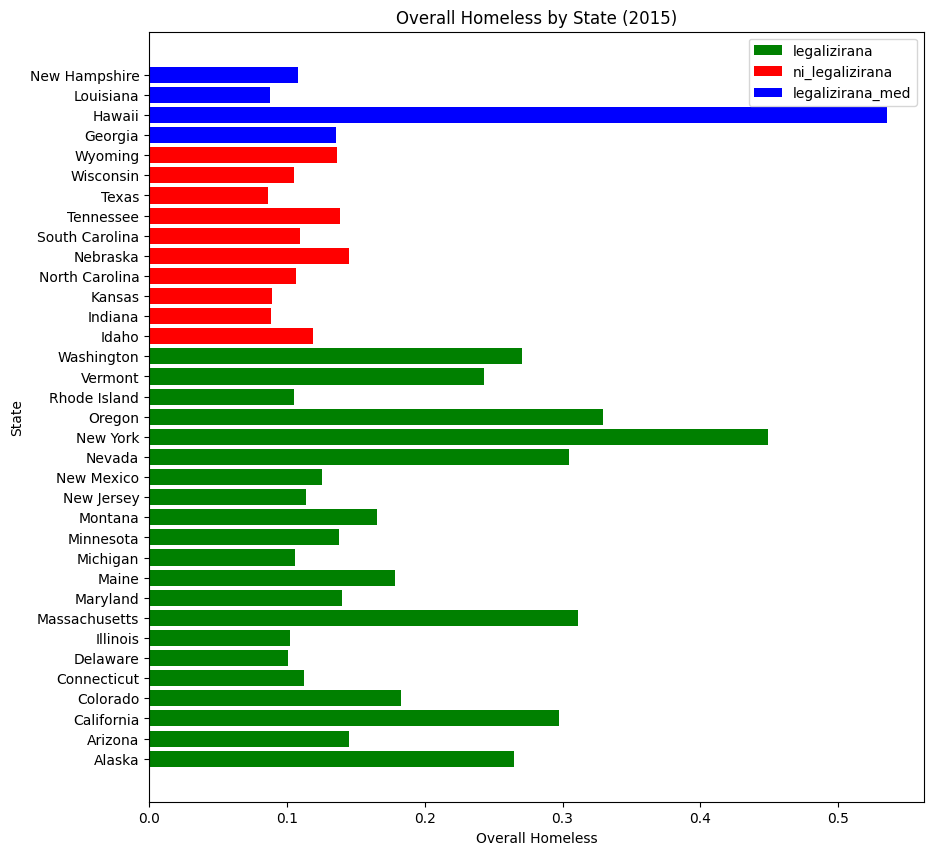

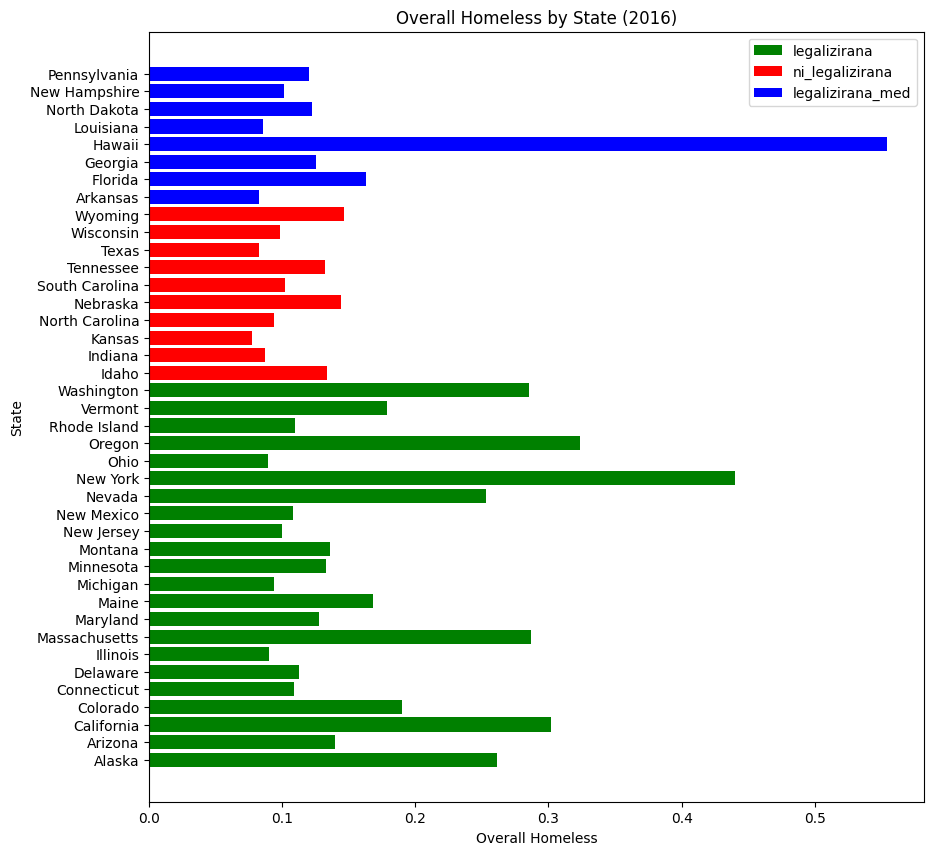

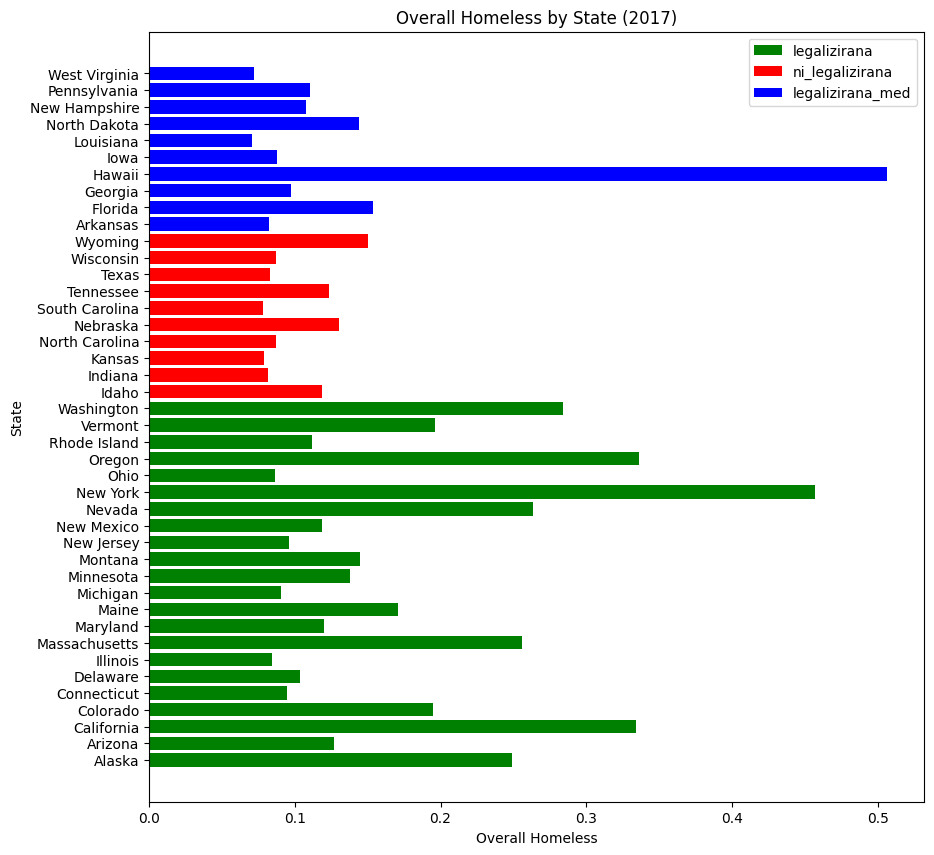

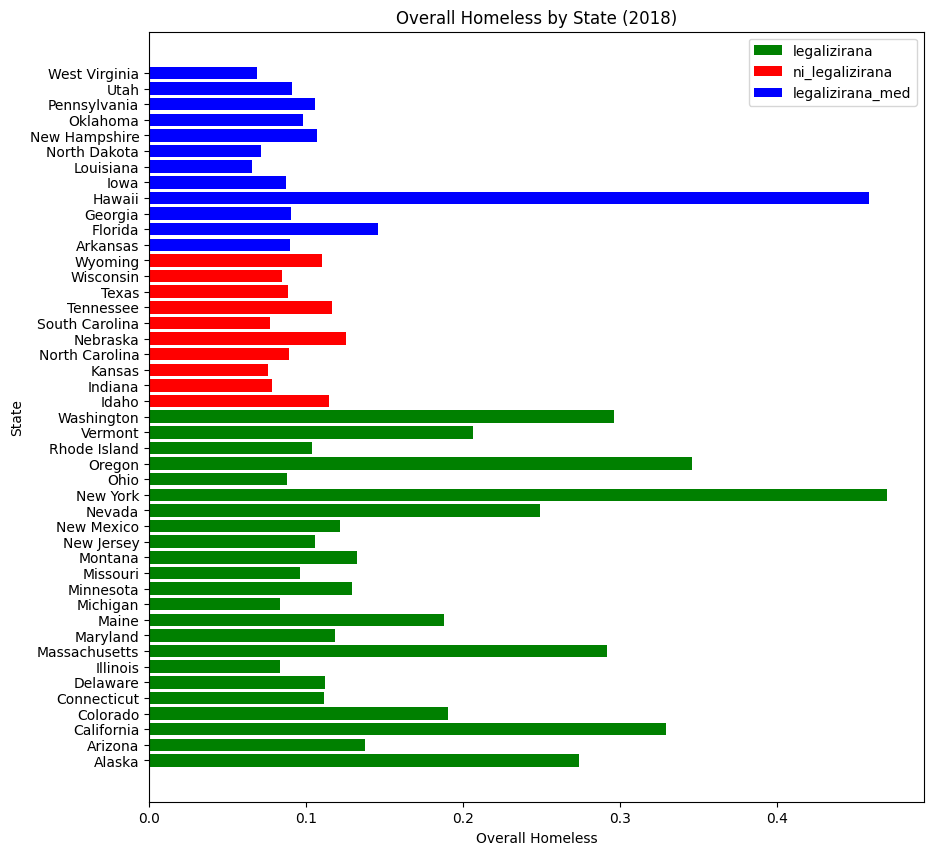

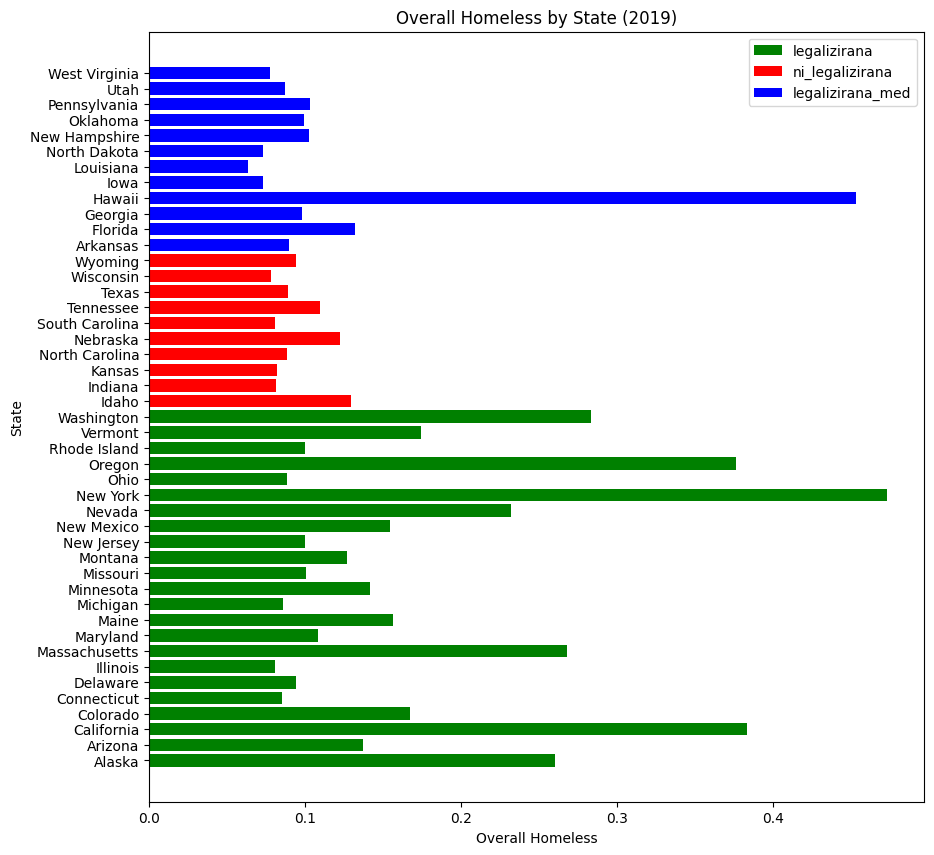

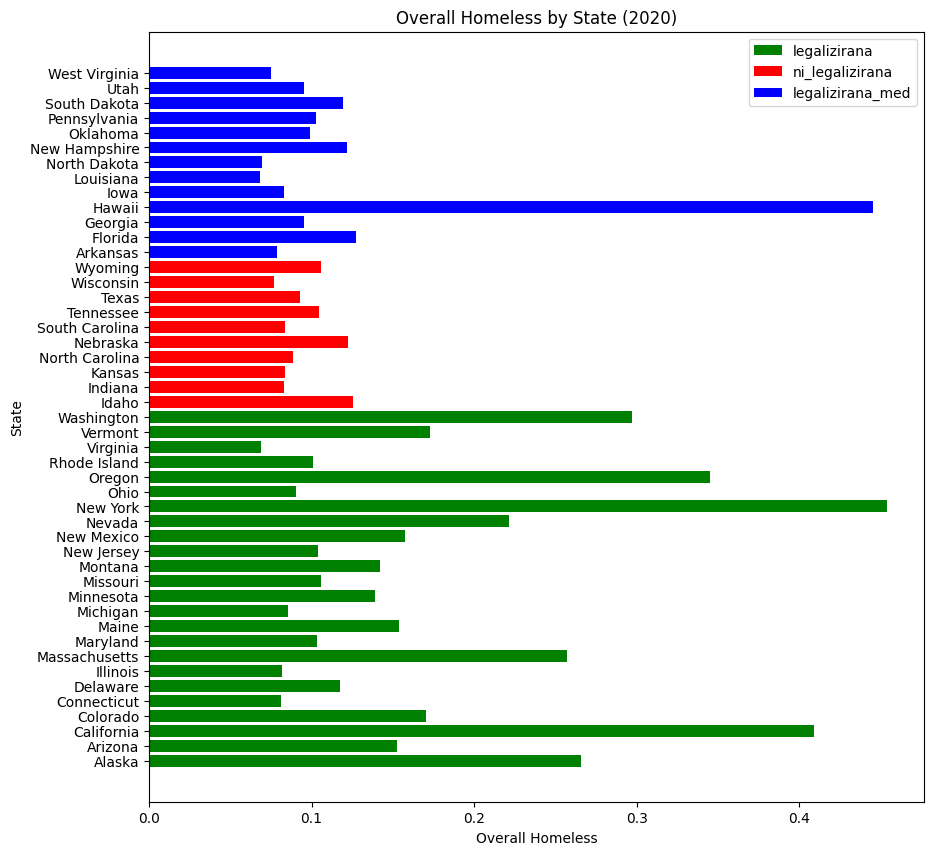

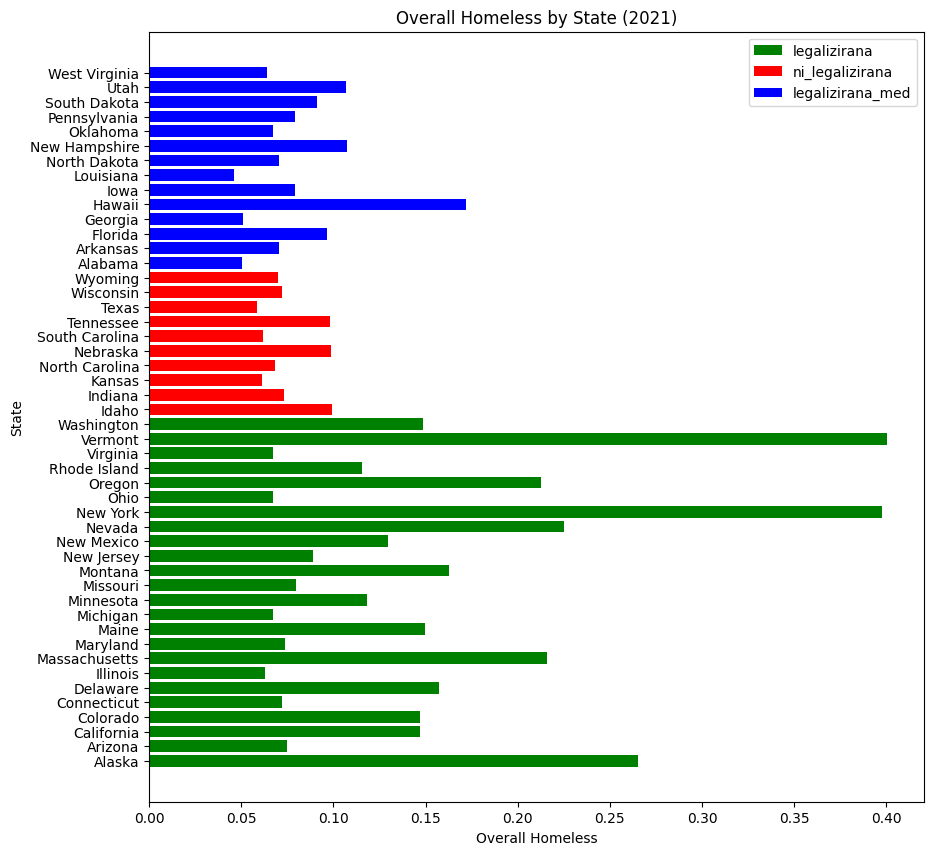

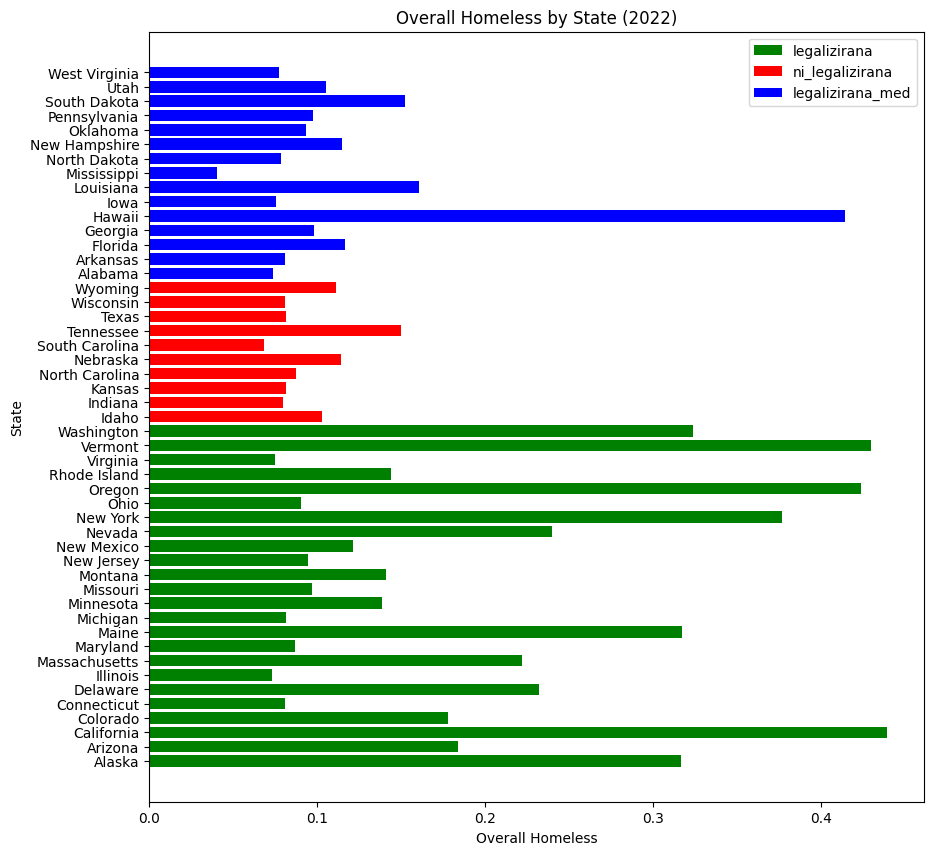

In [7]:


# Barve za različne kategorije
cmap = {
    'legalizirana': 'green',
    'legalizirana_med': 'blue',
    'legalizirana_rec': 'yellow',
    'ni_legalizirana': 'red'
}

def plot_graph(year):
    data = dict_homeless[year]
    state_names = [item[0] for item in data]
    overall_homeless = [item[1] for item in data]
    categories = [item[2] for item in data]

    # Seznam edinstvenih kategorij
    unique_categories = list(set(categories))

    plt.figure(figsize=(10, 10))

    #  podatke glede na kategorije in nato nariši stolpce
    for category in unique_categories:
        indices = [i for i, x in enumerate(categories) if x == category]
        plt.barh([state_names[i] for i in indices], [overall_homeless[i] for i in indices], color=cmap[category])

    plt.xlabel('Overall Homeless')
    plt.ylabel('State')
    plt.title(f'Overall Homeless by State ({year})')
    plt.legend(unique_categories)
    plt.show()

#  graf za vsako leto
for year in dict_homeless.keys():
    plot_graph(year)



Percentage of homeless by category: - 
Year: 2007, legalizirana: 0.36%
Year: 2008, legalizirana: 0.33%
Year: 2009, legalizirana: 0.34%
Year: 2010, legalizirana: 0.34%
Year: 2011, legalizirana: 0.30%
Year: 2012, legalizirana: 0.30%
Year: 2013, legalizirana: 0.25%
Year: 2014, legalizirana: 0.26%
Year: 2015, legalizirana: 0.27%
Year: 2016, legalizirana: 0.29%
Year: 2017, legalizirana: 0.28%
Year: 2018, legalizirana: 0.30%
Year: 2019, legalizirana: 0.28%
Year: 2020, legalizirana: 0.30%
Year: 2021, legalizirana: 0.15%
Year: 2022, legalizirana: 0.32%

Percentage of homeless by category: - 
Year: 2007, legalizirana_med: 0.46%
Year: 2008, legalizirana_med: 0.45%
Year: 2009, legalizirana_med: 0.43%
Year: 2010, legalizirana_med: 0.43%
Year: 2011, legalizirana_med: 0.45%
Year: 2012, legalizirana_med: 0.45%
Year: 2013, legalizirana_med: 0.11%
Year: 2014, legalizirana_med: 0.10%
Year: 2015, legalizirana_med: 0.11%
Year: 2016, legalizirana_med: 0.12%
Year: 2017, legalizirana_med: 0.07%
Year: 2018, 

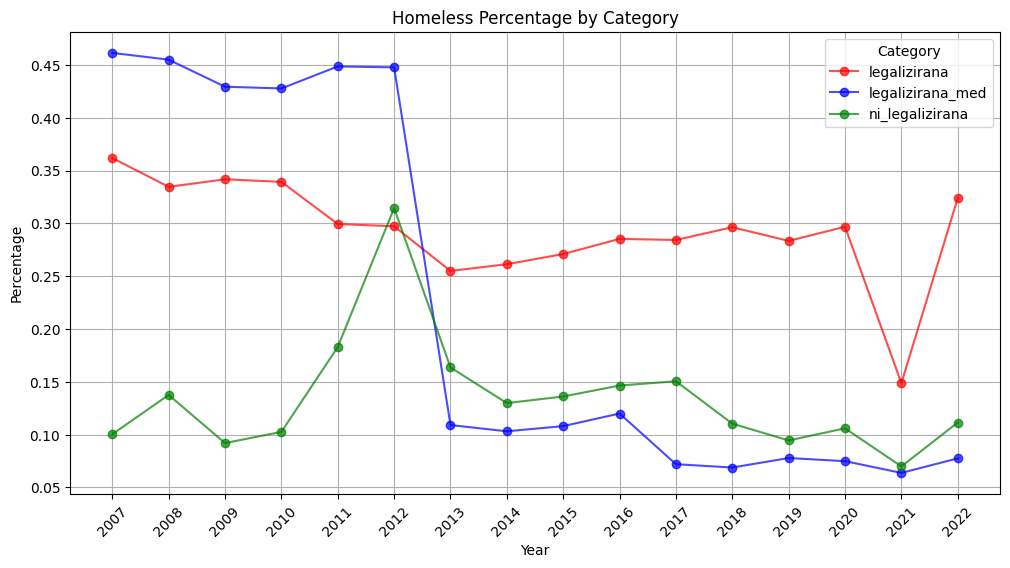

In [8]:
for year, data_list in dict_homeless.items():
    categories = {}
    for data in data_list:
        state_name, percentage, category = data
        if category not in categories:
            categories[category] = 0
        categories[category] += percentage


scatter_data = {category: {year: 0 for year in dict_homeless.keys()} for category in categories.keys()}


for year, data_list in dict_homeless.items():
    for data in data_list:
        state_name, percentage, category = data
        scatter_data[category][year] = percentage


colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create scatter plot
plt.figure(figsize=(12, 6))

for i, category in enumerate(categories.keys()):
    x = list(scatter_data[category].keys())
    y = list(scatter_data[category].values())

    plt.plot(x, y, label=category, color=colors[i], alpha=0.7, marker='o')

    # Print homeless count for each year and category
    print(f"\nPercentage of homeless by category: - ")
    for year, percentage in scatter_data[category].items():
        print(f"Year: {year}, {category}: {percentage:.2f}%")

plt.title("Homeless Percentage by Category")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.xticks(list(dict_homeless.keys()), rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()


### PRIKAZ ŠTEVILA NEZAPOSLENIH GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE

In [9]:
unemployment_data = r"podatki\unemployment.csv"
unemployment_df = pd.read_csv(unemployment_data)

dict_unemployment = {}
for index_unemployment, row_unemployment in unemployment_df.iterrows():
    year = row_unemployment["Year"]
    state_code_unemployment = row_unemployment["State"]
    unemployment_rate = row_unemployment["Unemployment_rate"]
    
    for k, v in legalization_dict.items():
        for element in v["ni_legalizirana"] + v["legalizirana_med"] + v["legalizirana_rec"] + v["legalizirana"]:
            state_name = element[0]
            state_code = element[1]
            if state_code == state_code_unemployment:
                if year not in dict_unemployment:
                    dict_unemployment[year] = []
                dict_unemployment[year].append([state_name, unemployment_rate, k])

#print("Vsebina datoteke 'unemployment.csv':")
#print(unemployment_df.head())

for year in range(2000, 2023):
    dict_unemployment[year] = []
    unemployment_df = pd.read_csv(unemployment_data)
    for index_unemployment, row_unemployment in unemployment_df.iterrows():
        unemployment_year = row_unemployment["Year"]
        state_code_unemployment = row_unemployment["State"]
        unemployment_rate = row_unemployment["Unemployment_rate"]
        
        if unemployment_year == year:
            for k, v in legalization_dict[year].items():
                for element in v:
                    state_name = element[0]
                    state_code = element[1]
                    if state_code == state_code_unemployment:
                        dict_unemployment[year].append([state_name, unemployment_rate, k])

#print("\nPodatki o brezposelnosti po letih:")
#for year, data in dict_unemployment.items():
 #   print(f"Leto {year}:")
 #   for entry in data:
   #     print(f"   Država: {entry[0]}, Stopnja brezposelnosti: {entry[1]}, Kategorija legalizacije: {entry[2]}")

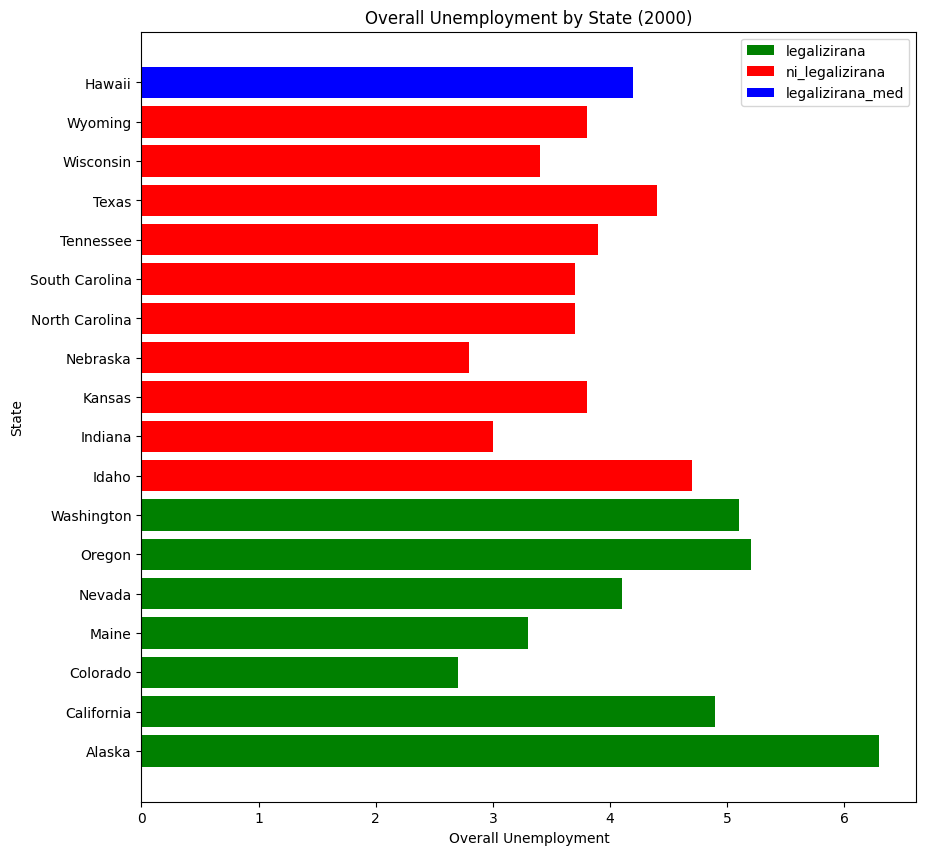

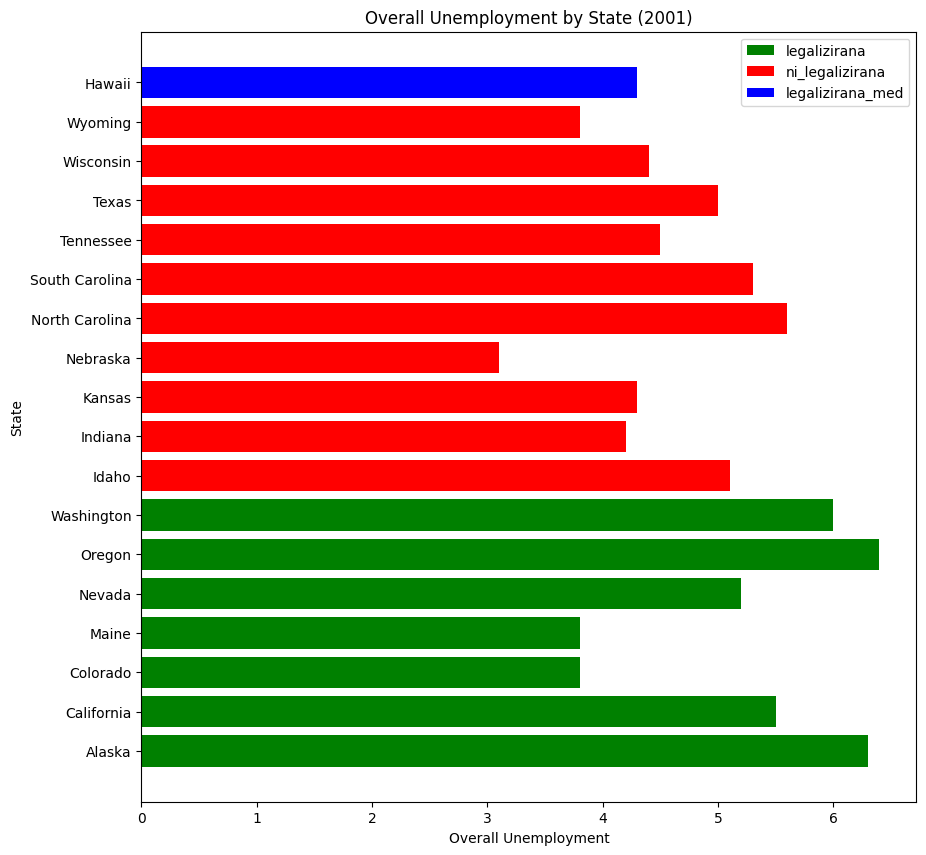

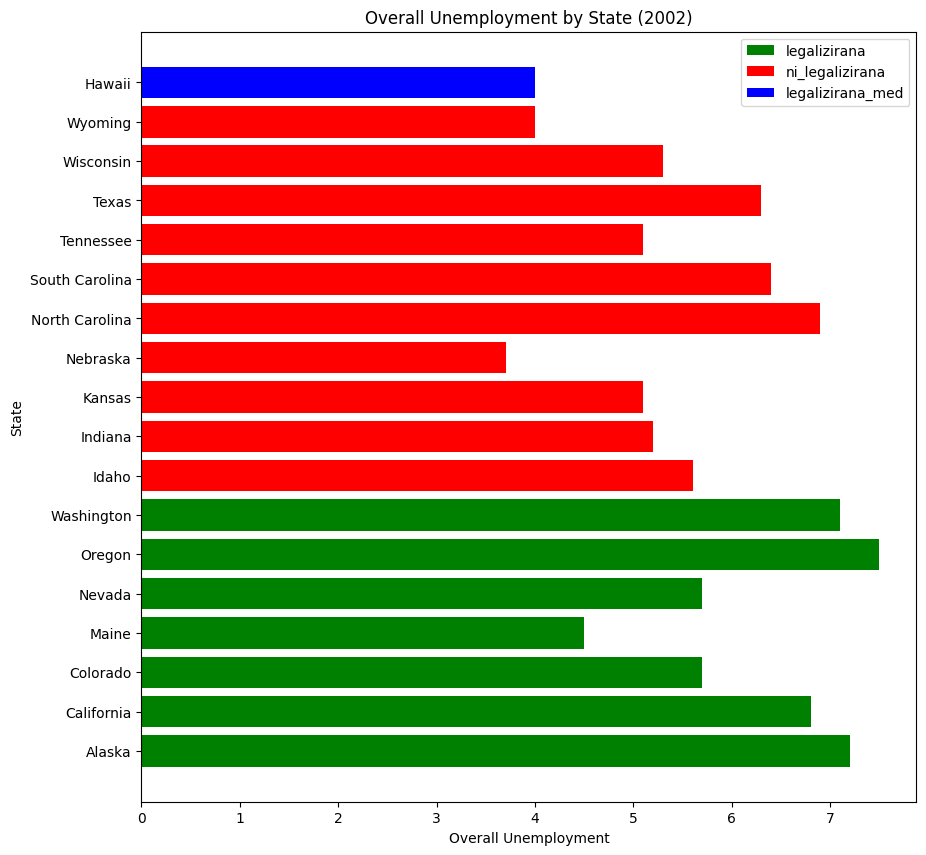

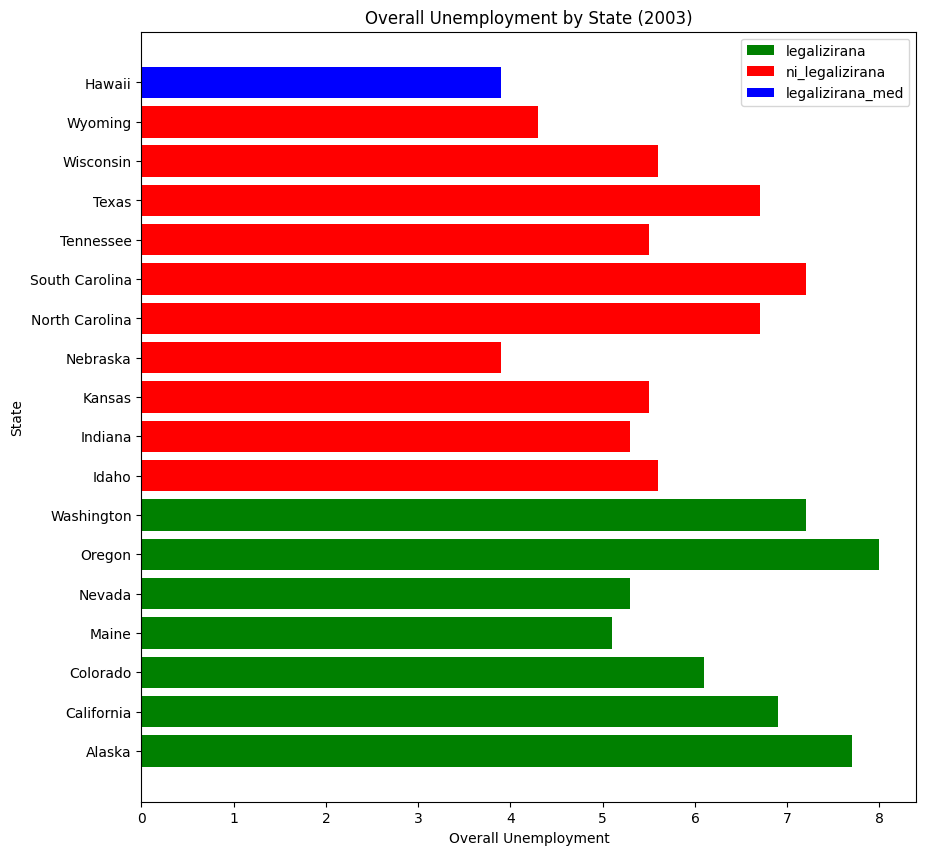

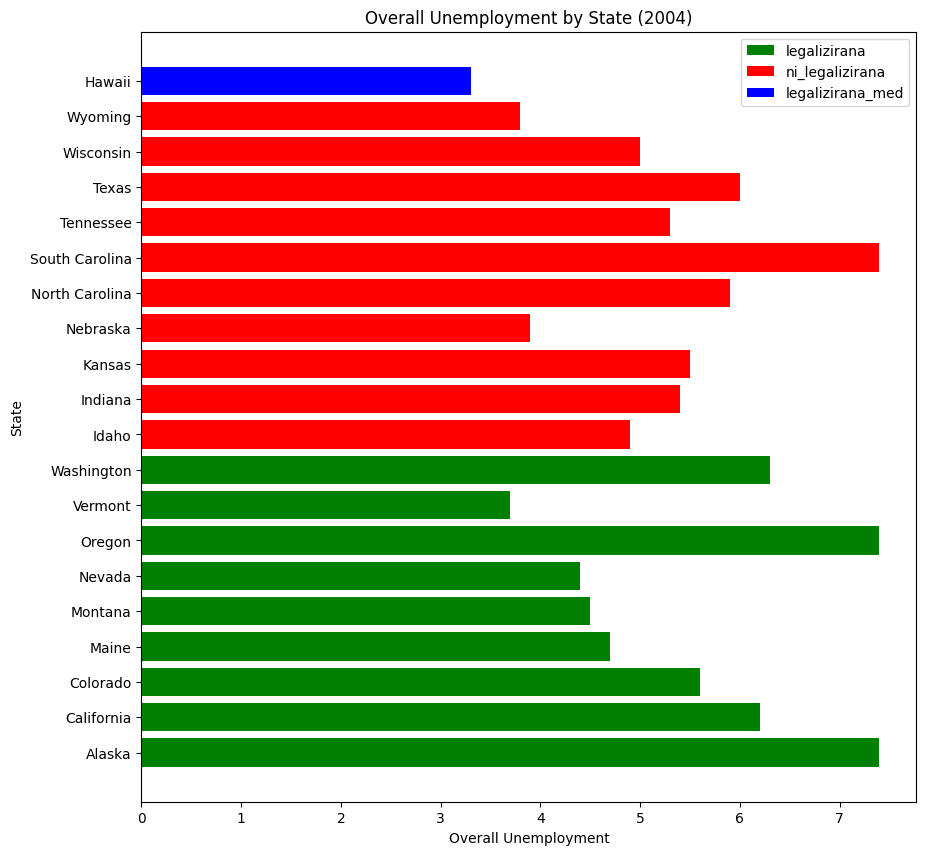

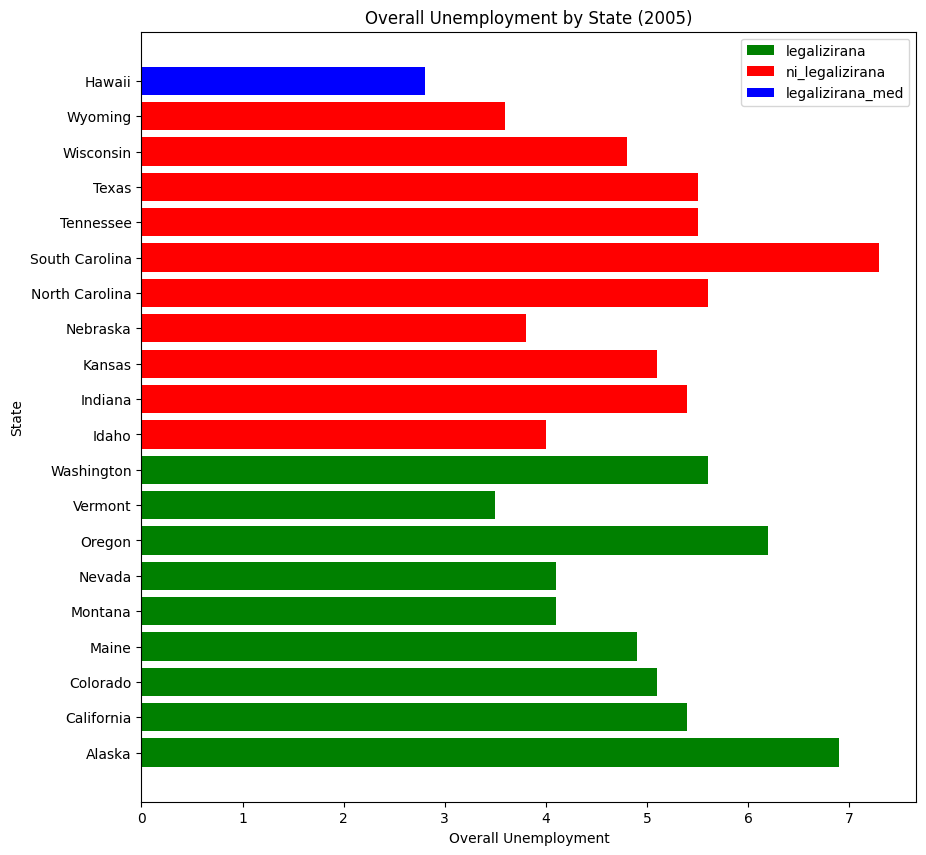

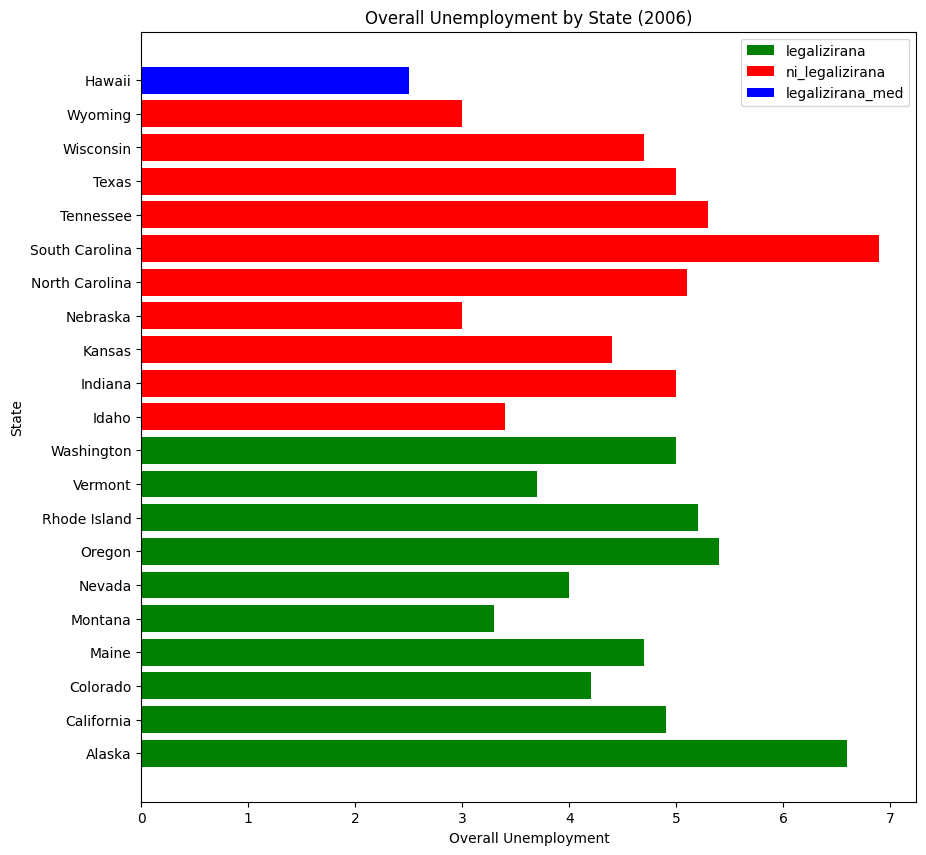

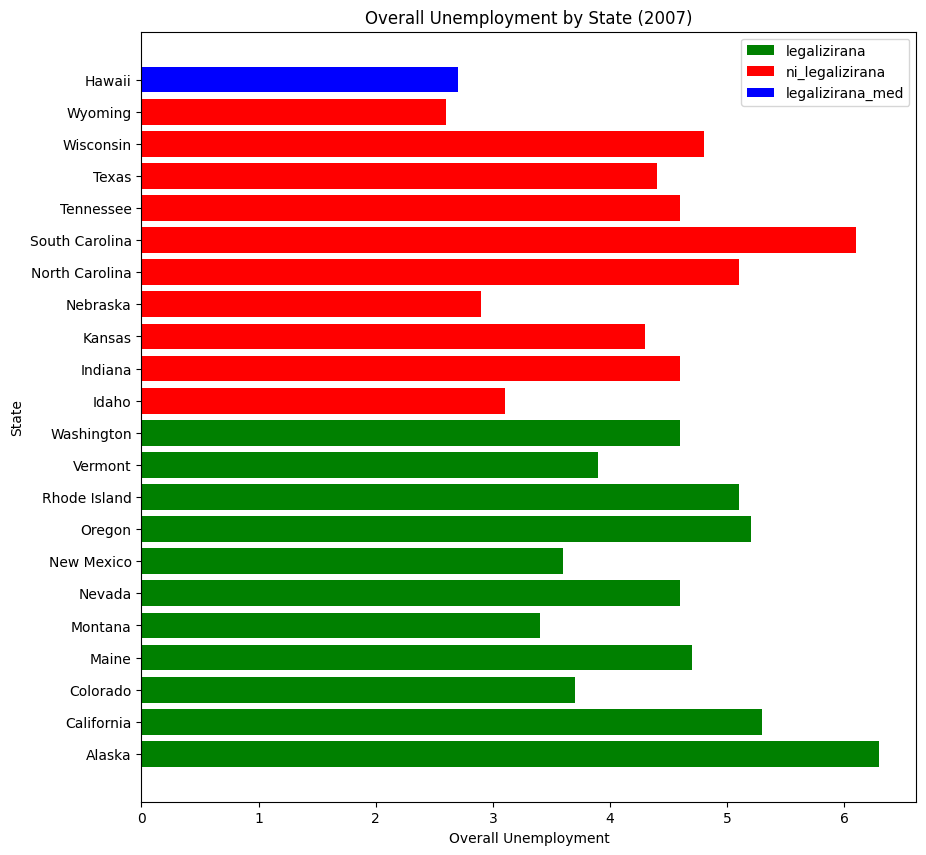

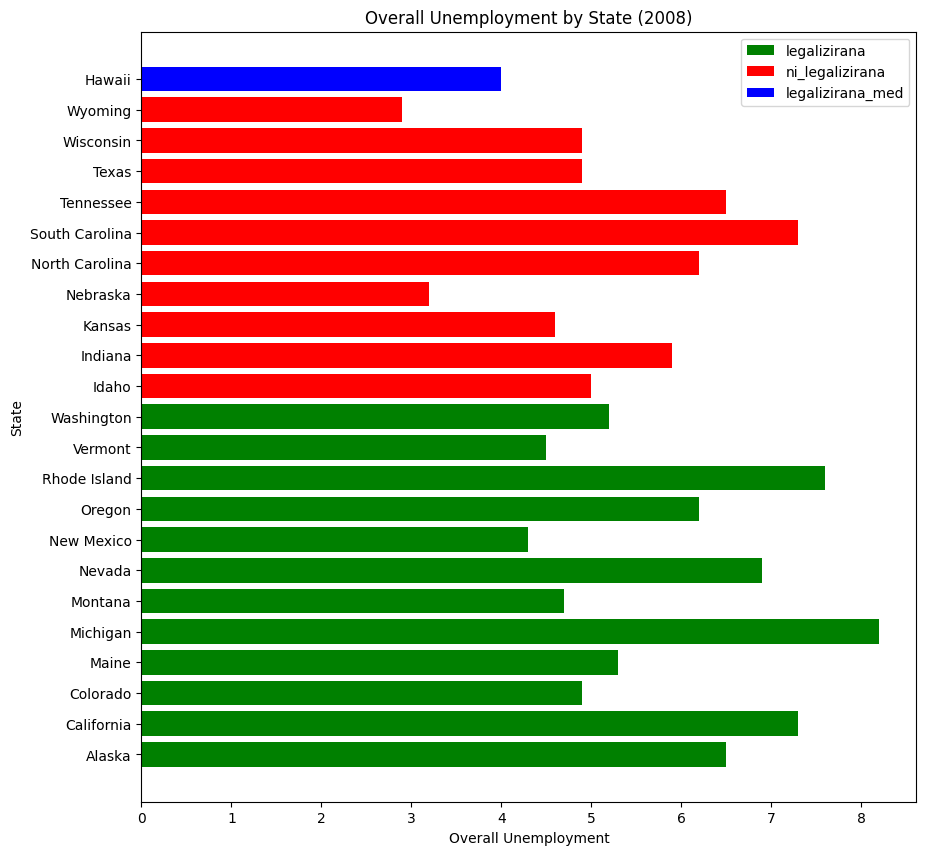

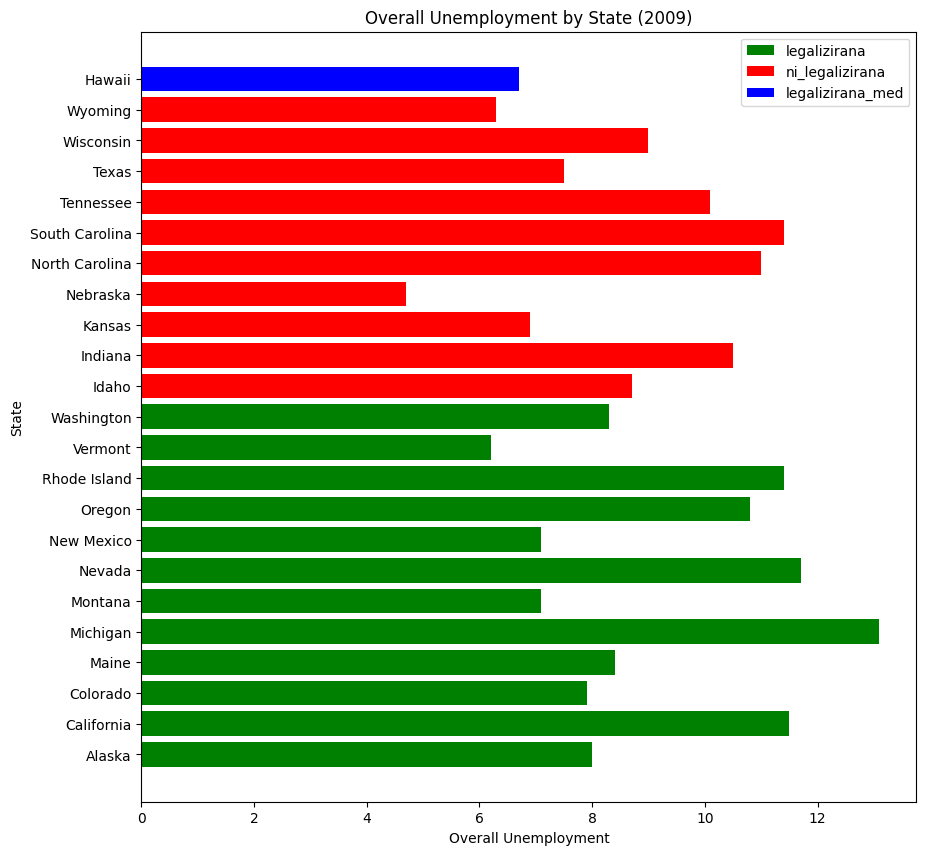

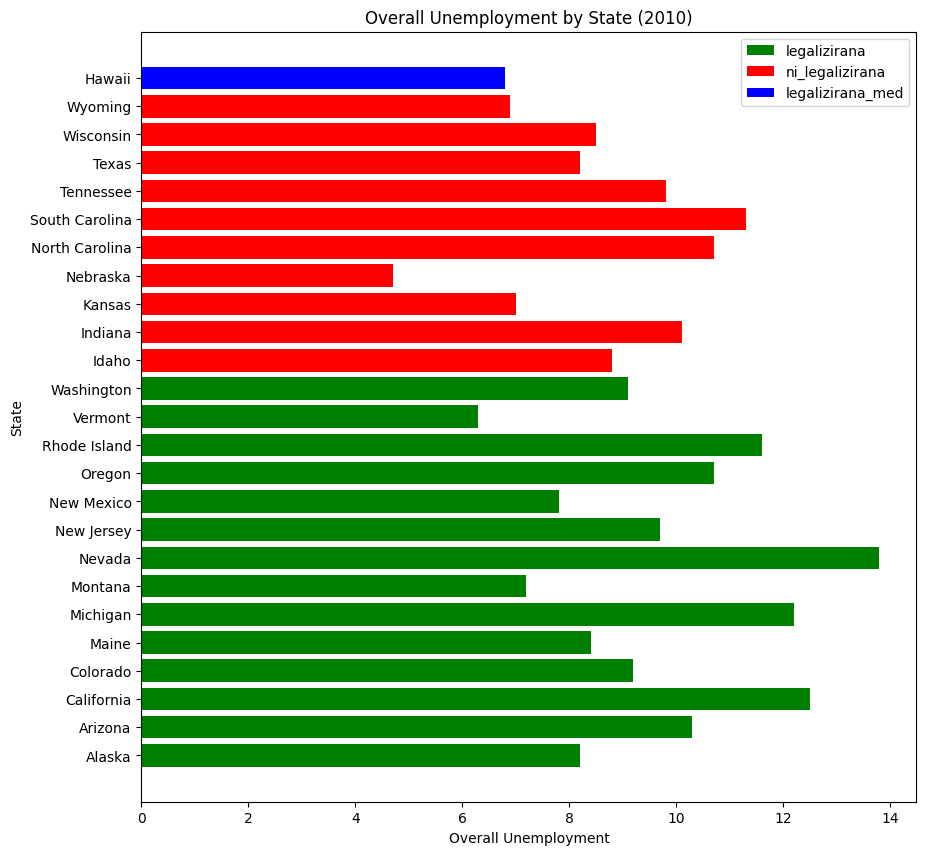

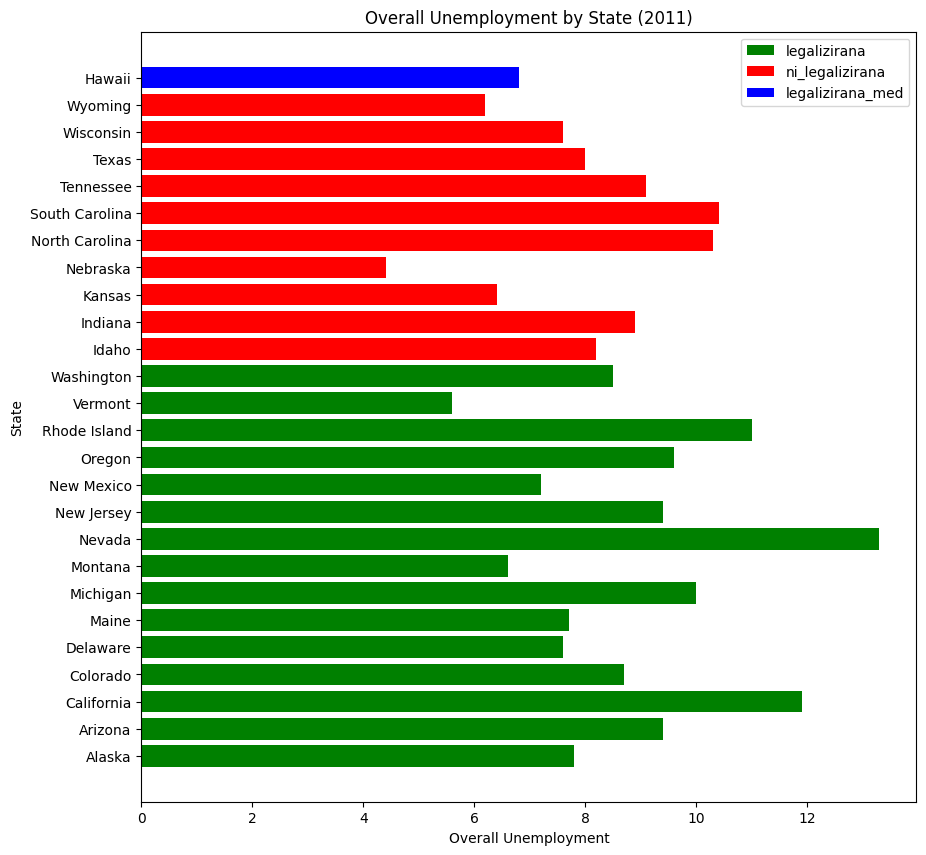

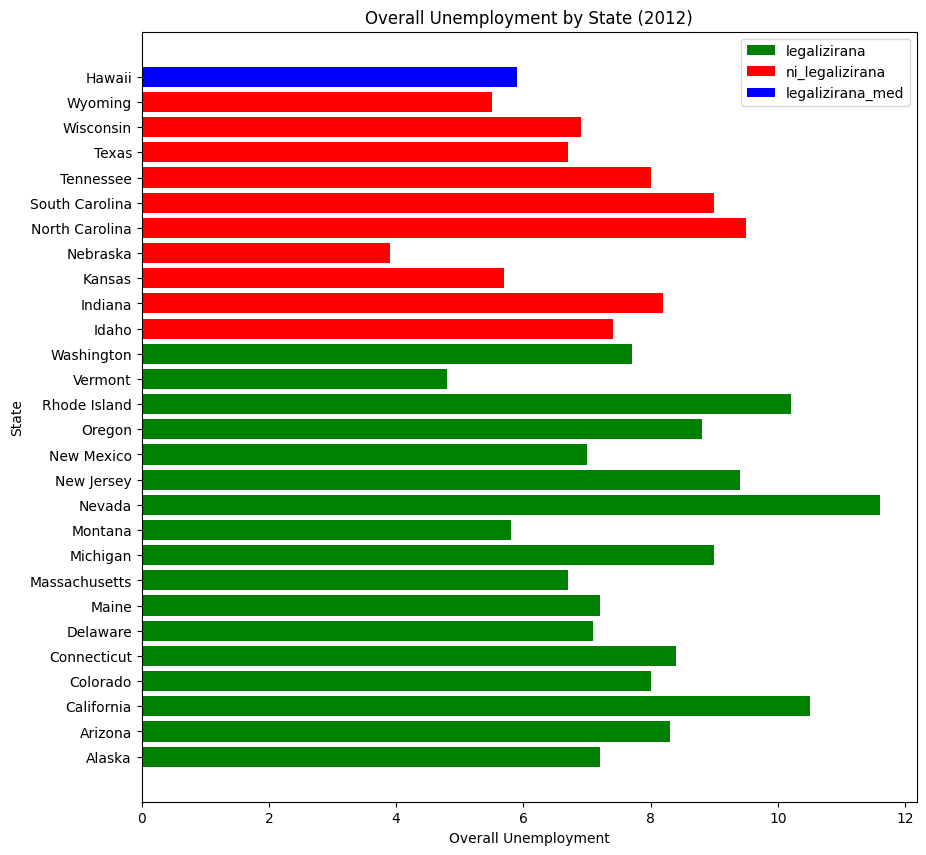

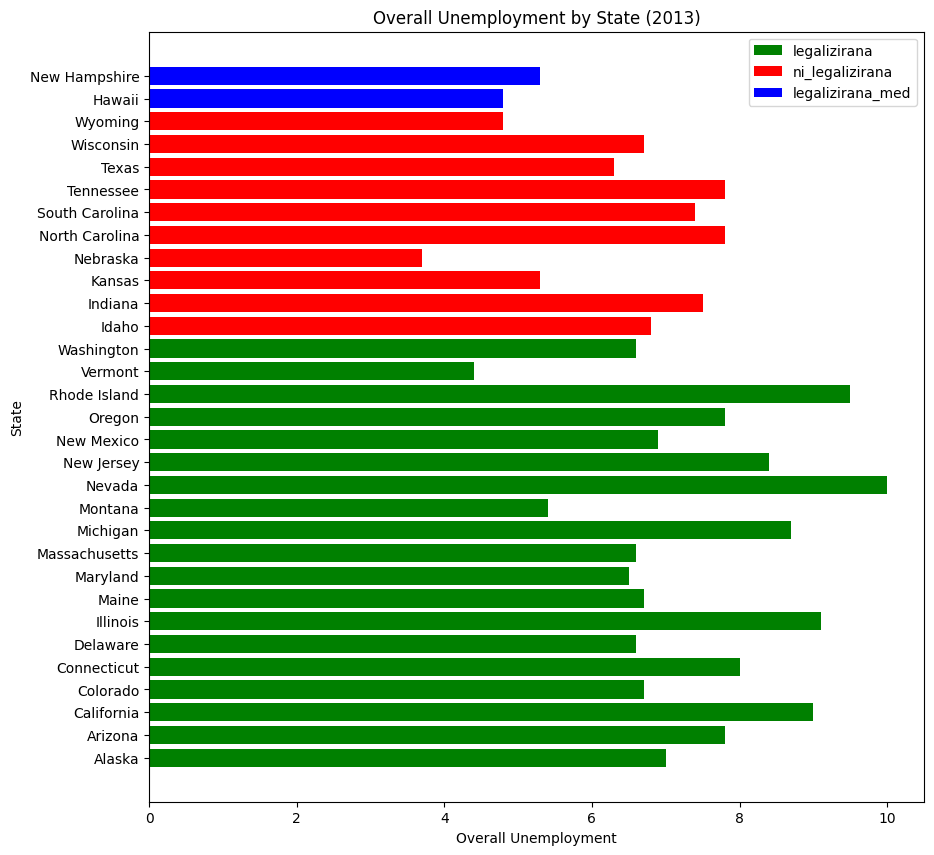

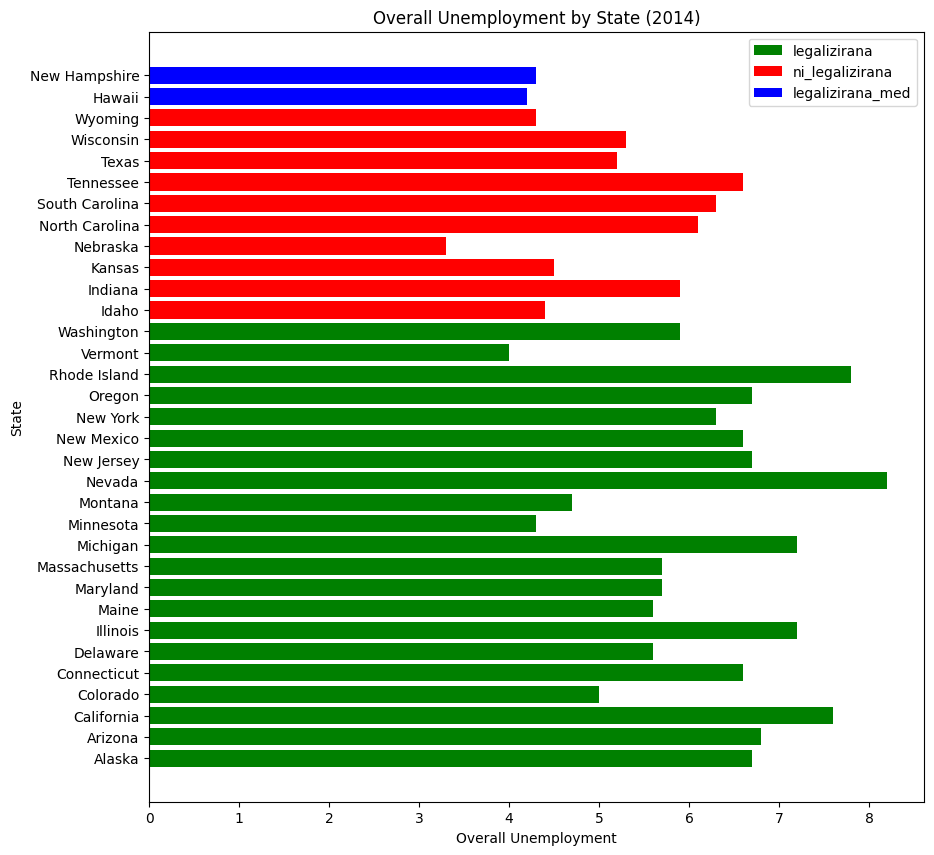

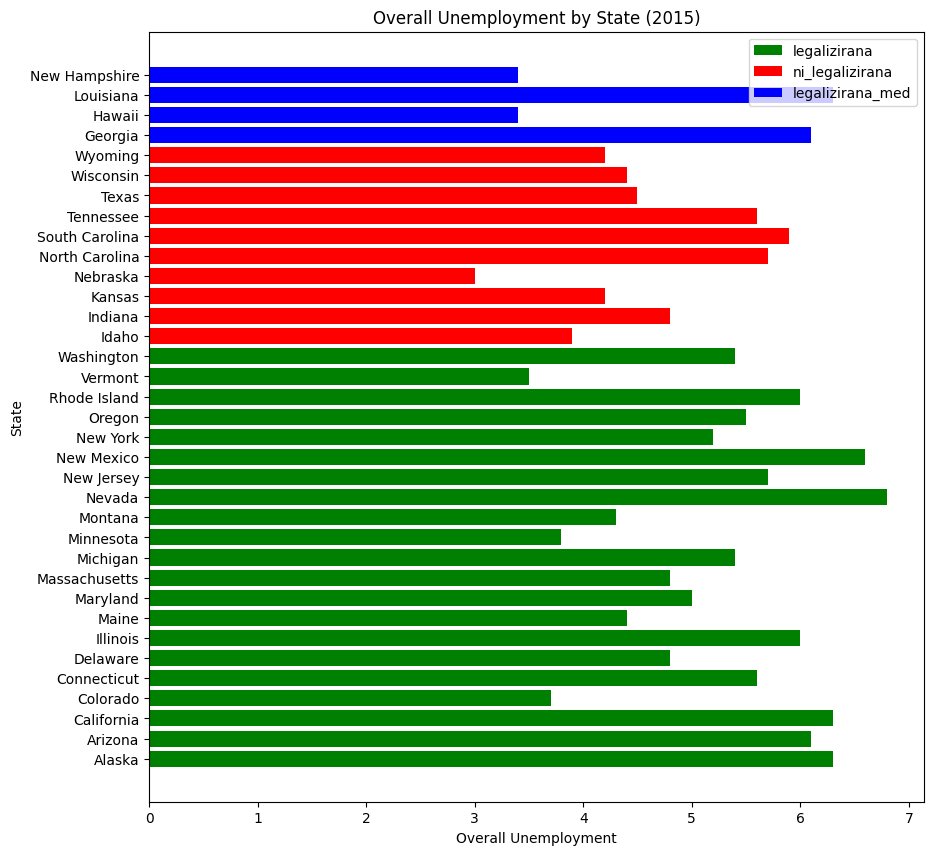

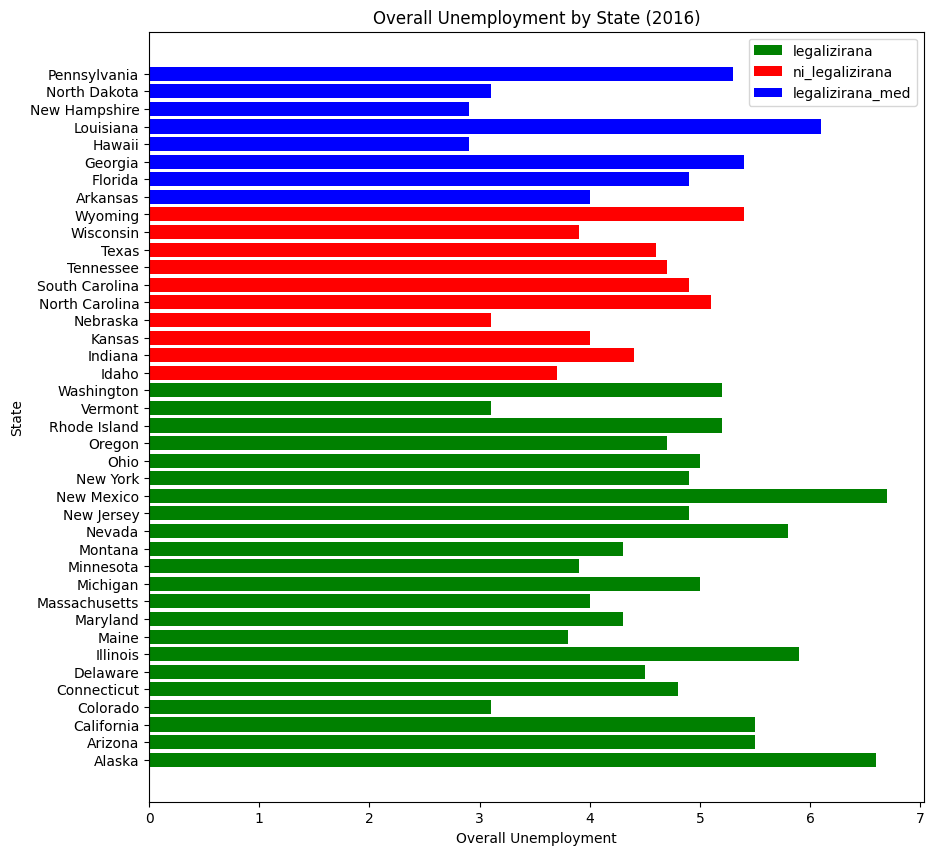

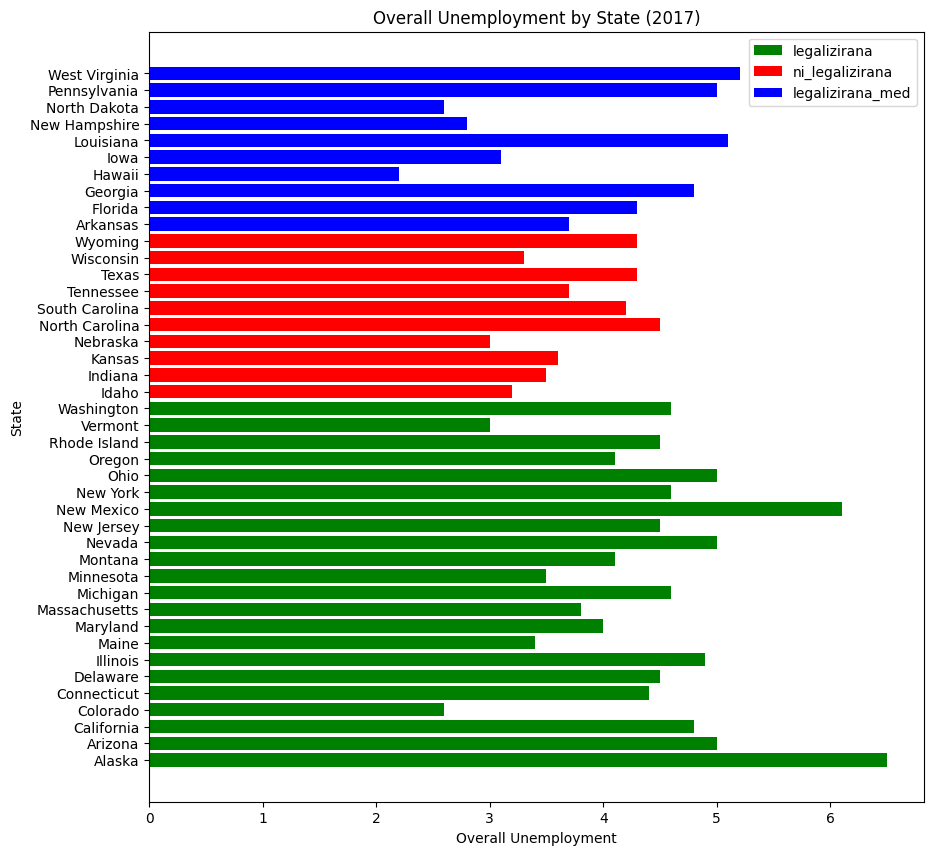

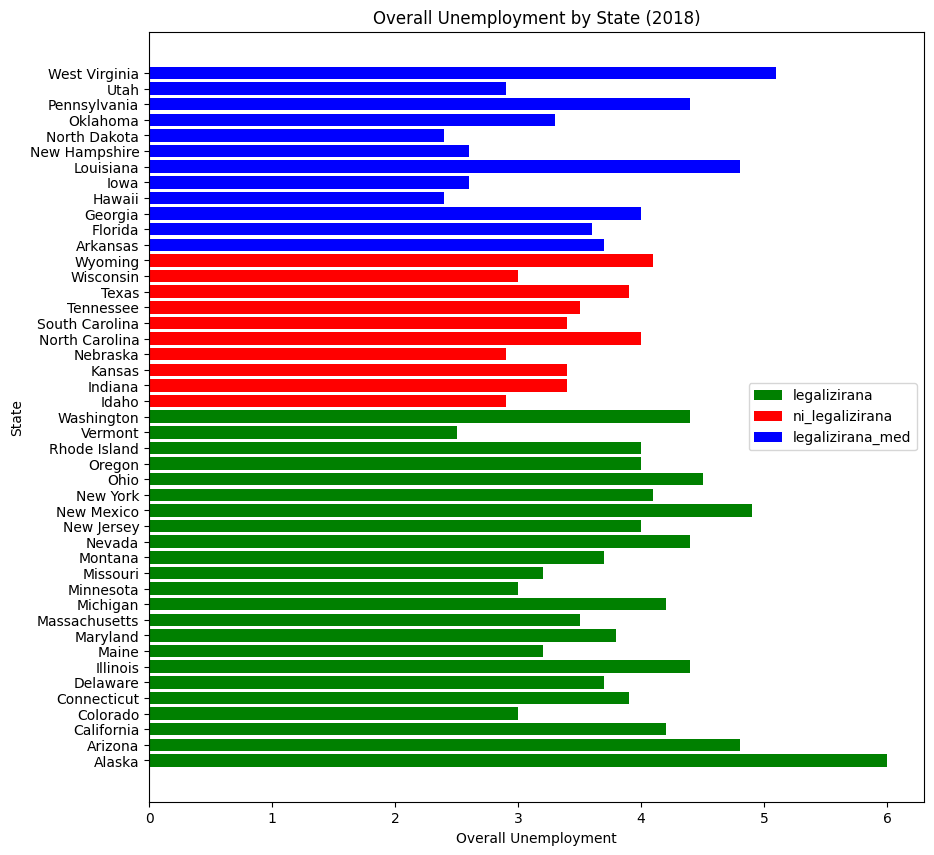

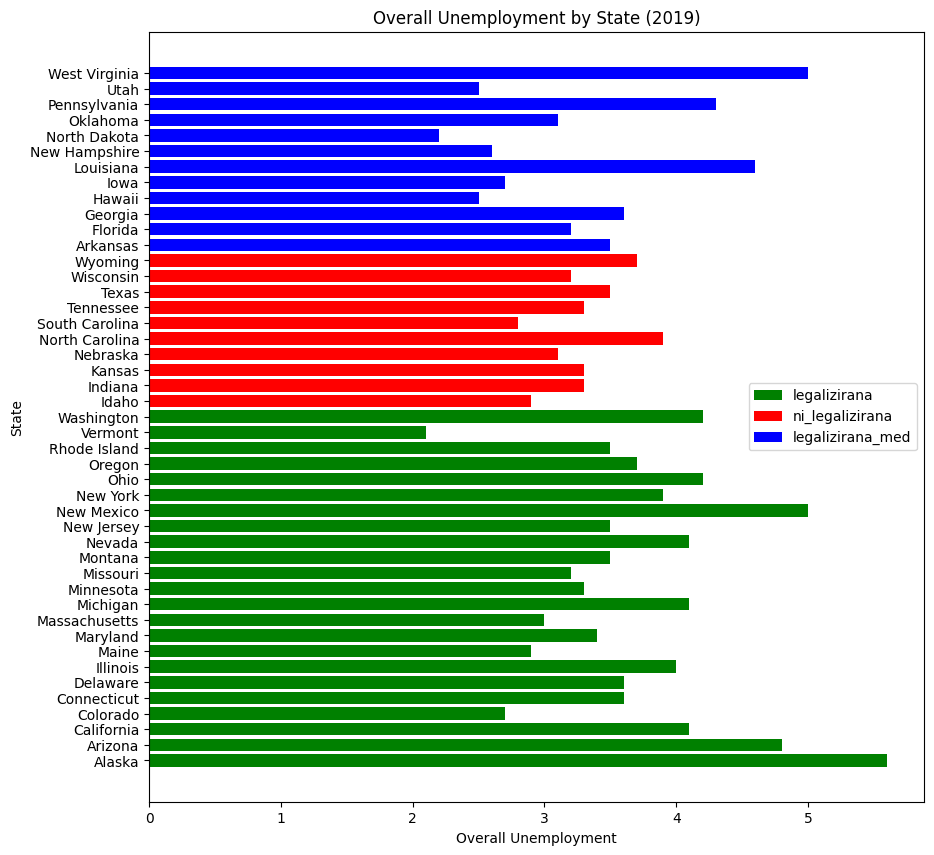

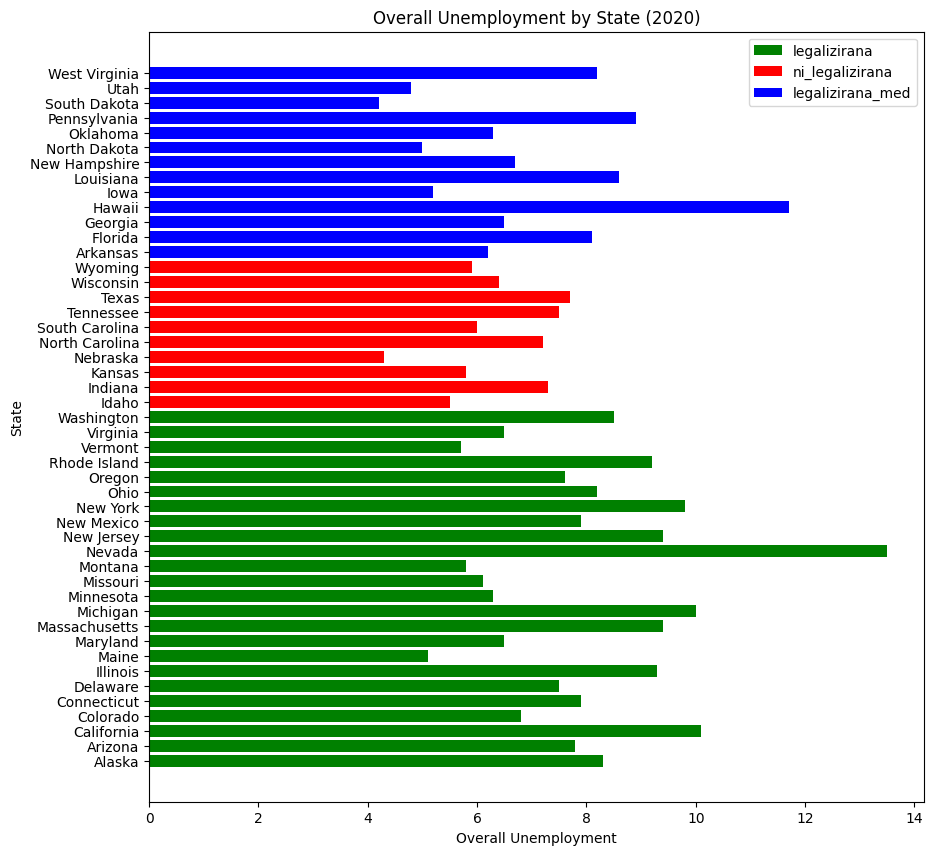

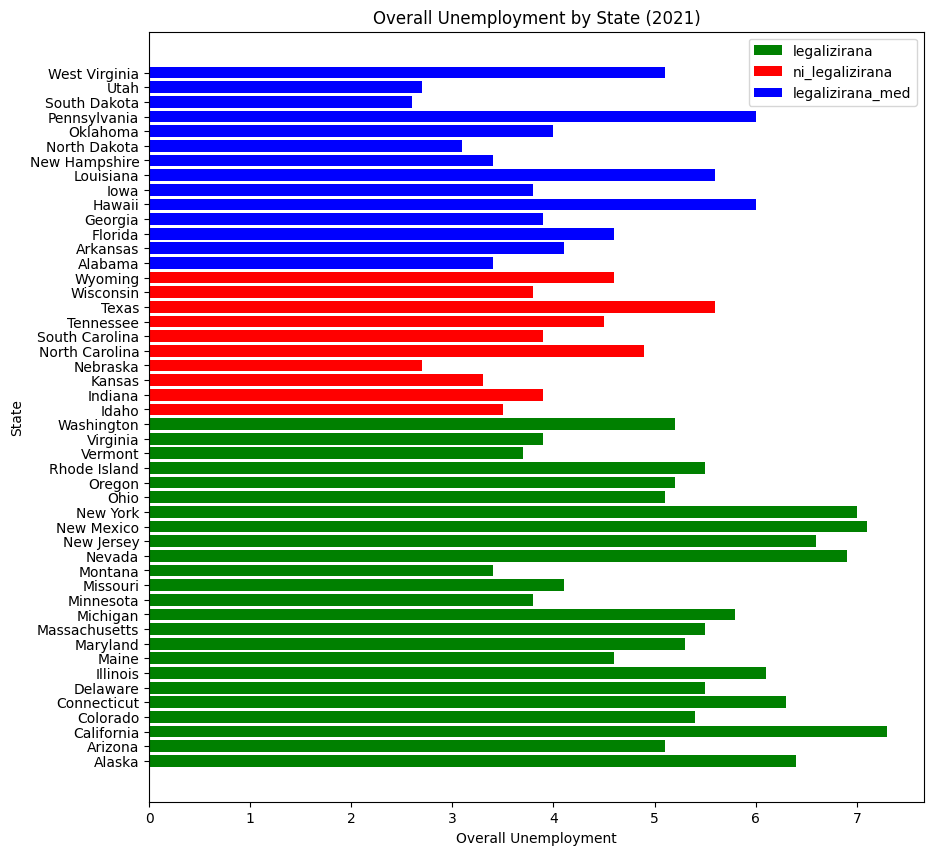

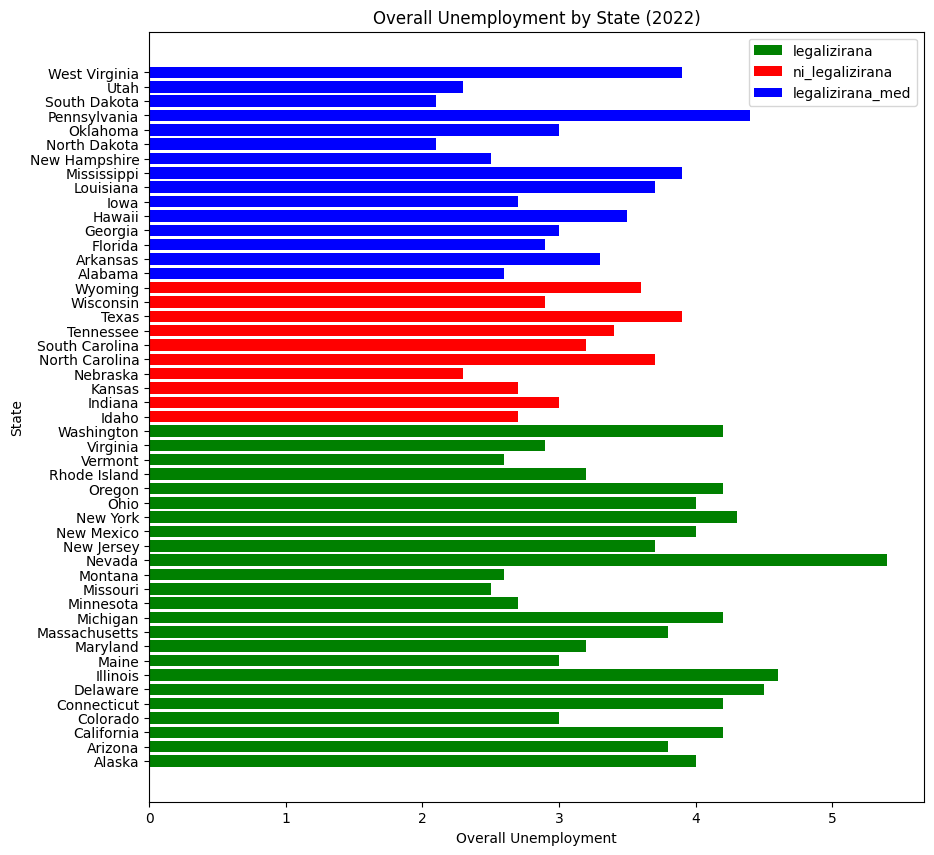

In [10]:
cmap = {
    'legalizirana': 'green',
    'legalizirana_med': 'blue',
    'legalizirana_rec': 'yellow',
    'ni_legalizirana': 'red'
}

def plot_graph(year):
    data = dict_unemployment[year]
    state_names = [item[0] for item in data]
    overall_homeless = [item[1] for item in data]
    categories = [item[2] for item in data]

    # Seznam edinstvenih kategorij
    unique_categories = list(set(categories))

    plt.figure(figsize=(10, 10))

    for category in unique_categories:
        indices = [i for i, x in enumerate(categories) if x == category]
        plt.barh([state_names[i] for i in indices], [overall_homeless[i] for i in indices], color=cmap[category])

    plt.xlabel('Overall Unemployment')
    plt.ylabel('State')
    plt.title(f'Overall Unemployment by State ({year})')
    plt.legend(unique_categories)
    plt.show()


for year in dict_unemployment.keys():
    plot_graph(year)



Unemployment rate by category: - 
Year: 2000, legalizirana: 5.10%
Year: 2001, legalizirana: 6.00%
Year: 2002, legalizirana: 7.10%
Year: 2003, legalizirana: 7.20%
Year: 2004, legalizirana: 6.30%
Year: 2005, legalizirana: 5.60%
Year: 2006, legalizirana: 5.00%
Year: 2007, legalizirana: 4.60%
Year: 2008, legalizirana: 5.20%
Year: 2009, legalizirana: 8.30%
Year: 2010, legalizirana: 9.10%
Year: 2011, legalizirana: 8.50%
Year: 2012, legalizirana: 7.70%
Year: 2013, legalizirana: 6.60%
Year: 2014, legalizirana: 5.90%
Year: 2015, legalizirana: 5.40%
Year: 2016, legalizirana: 5.20%
Year: 2017, legalizirana: 4.60%
Year: 2018, legalizirana: 4.40%
Year: 2019, legalizirana: 4.20%
Year: 2020, legalizirana: 8.50%
Year: 2021, legalizirana: 5.20%
Year: 2022, legalizirana: 4.20%

Unemployment rate by category: - 
Year: 2000, legalizirana_med: 4.20%
Year: 2001, legalizirana_med: 4.30%
Year: 2002, legalizirana_med: 4.00%
Year: 2003, legalizirana_med: 3.90%
Year: 2004, legalizirana_med: 3.30%
Year: 2005, le

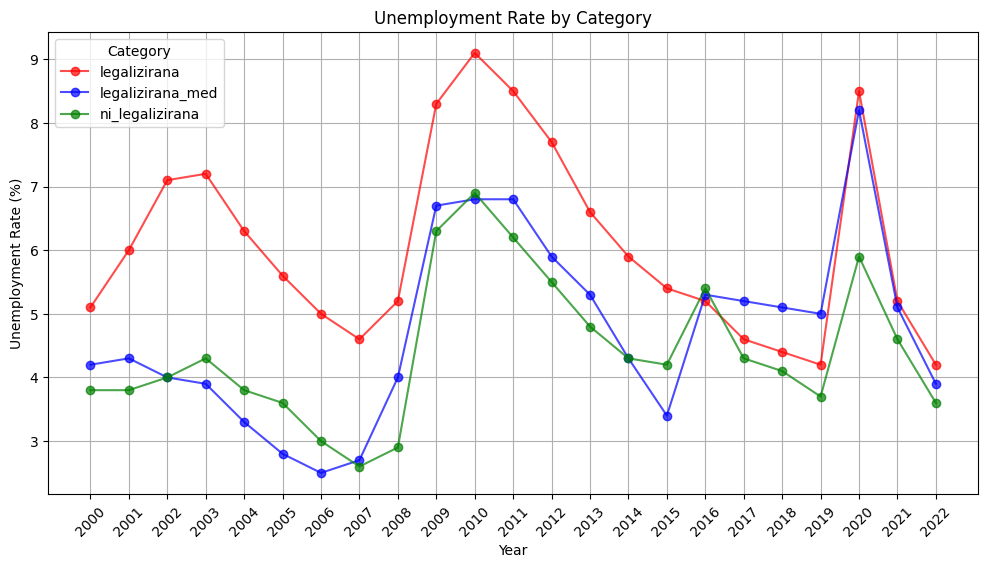

In [11]:
plt.figure(figsize=(12, 6))

for i, category in enumerate(categories.keys()):
    scatter_data_unemployment = {year: 0 for year in dict_unemployment.keys()}
    for year, data_list in dict_unemployment.items():
        for data in data_list:
            state_name, unemployment_rate, legalization_category = data
            if legalization_category == category:
                scatter_data_unemployment[year] = unemployment_rate
    
    x = list(scatter_data_unemployment.keys())
    y = list(scatter_data_unemployment.values())

    plt.plot(x, y, label=category, color=colors[i], alpha=0.7, marker='o')

    # unemployment rate for each year and category
    print(f"\nUnemployment rate by category: - ")
    for year, rate in scatter_data_unemployment.items():
        print(f"Year: {year}, {category}: {rate:.2f}%")

plt.title("Unemployment Rate by Category")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(list(dict_unemployment.keys()), rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()
